***Import libraires and data, set up stuff***

In [1]:
import scanpy as sc
import pandas as pd
import scvelo as scv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import anndata as ad


In [2]:
import rpy2.rinterface_lib.callbacks
import logging

from rpy2.robjects import pandas2ri
import anndata2ri

In [3]:
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

In [4]:
plt.rcParams['figure.figsize']=(6,6) #rescale figures

In [52]:
sample = sc.read('../data/notebooks_data/sample_123.filt.norm.h5ad')

Only considering the two last: ['.norm', '.h5ad'].
Only considering the two last: ['.norm', '.h5ad'].


Clustering

In [53]:
sc.tl.leiden(sample, resolution=.3, key_added='leiden', use_weights=True, random_state=17917 )

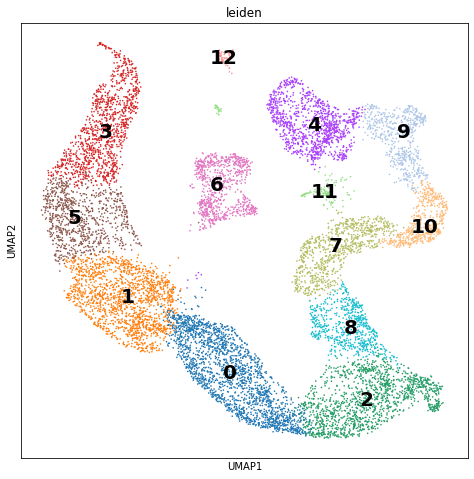

In [54]:
plt.rcParams['figure.figsize']=(8,8)
sc.pl.umap(sample, color=['leiden'], cmap='Blues', legend_loc='on data', legend_fontsize=20)

In [55]:
sc.tl.rank_genes_groups(sample, groupby='leiden', key_added='DE_leiden', use_raw=False, n_genes=50)

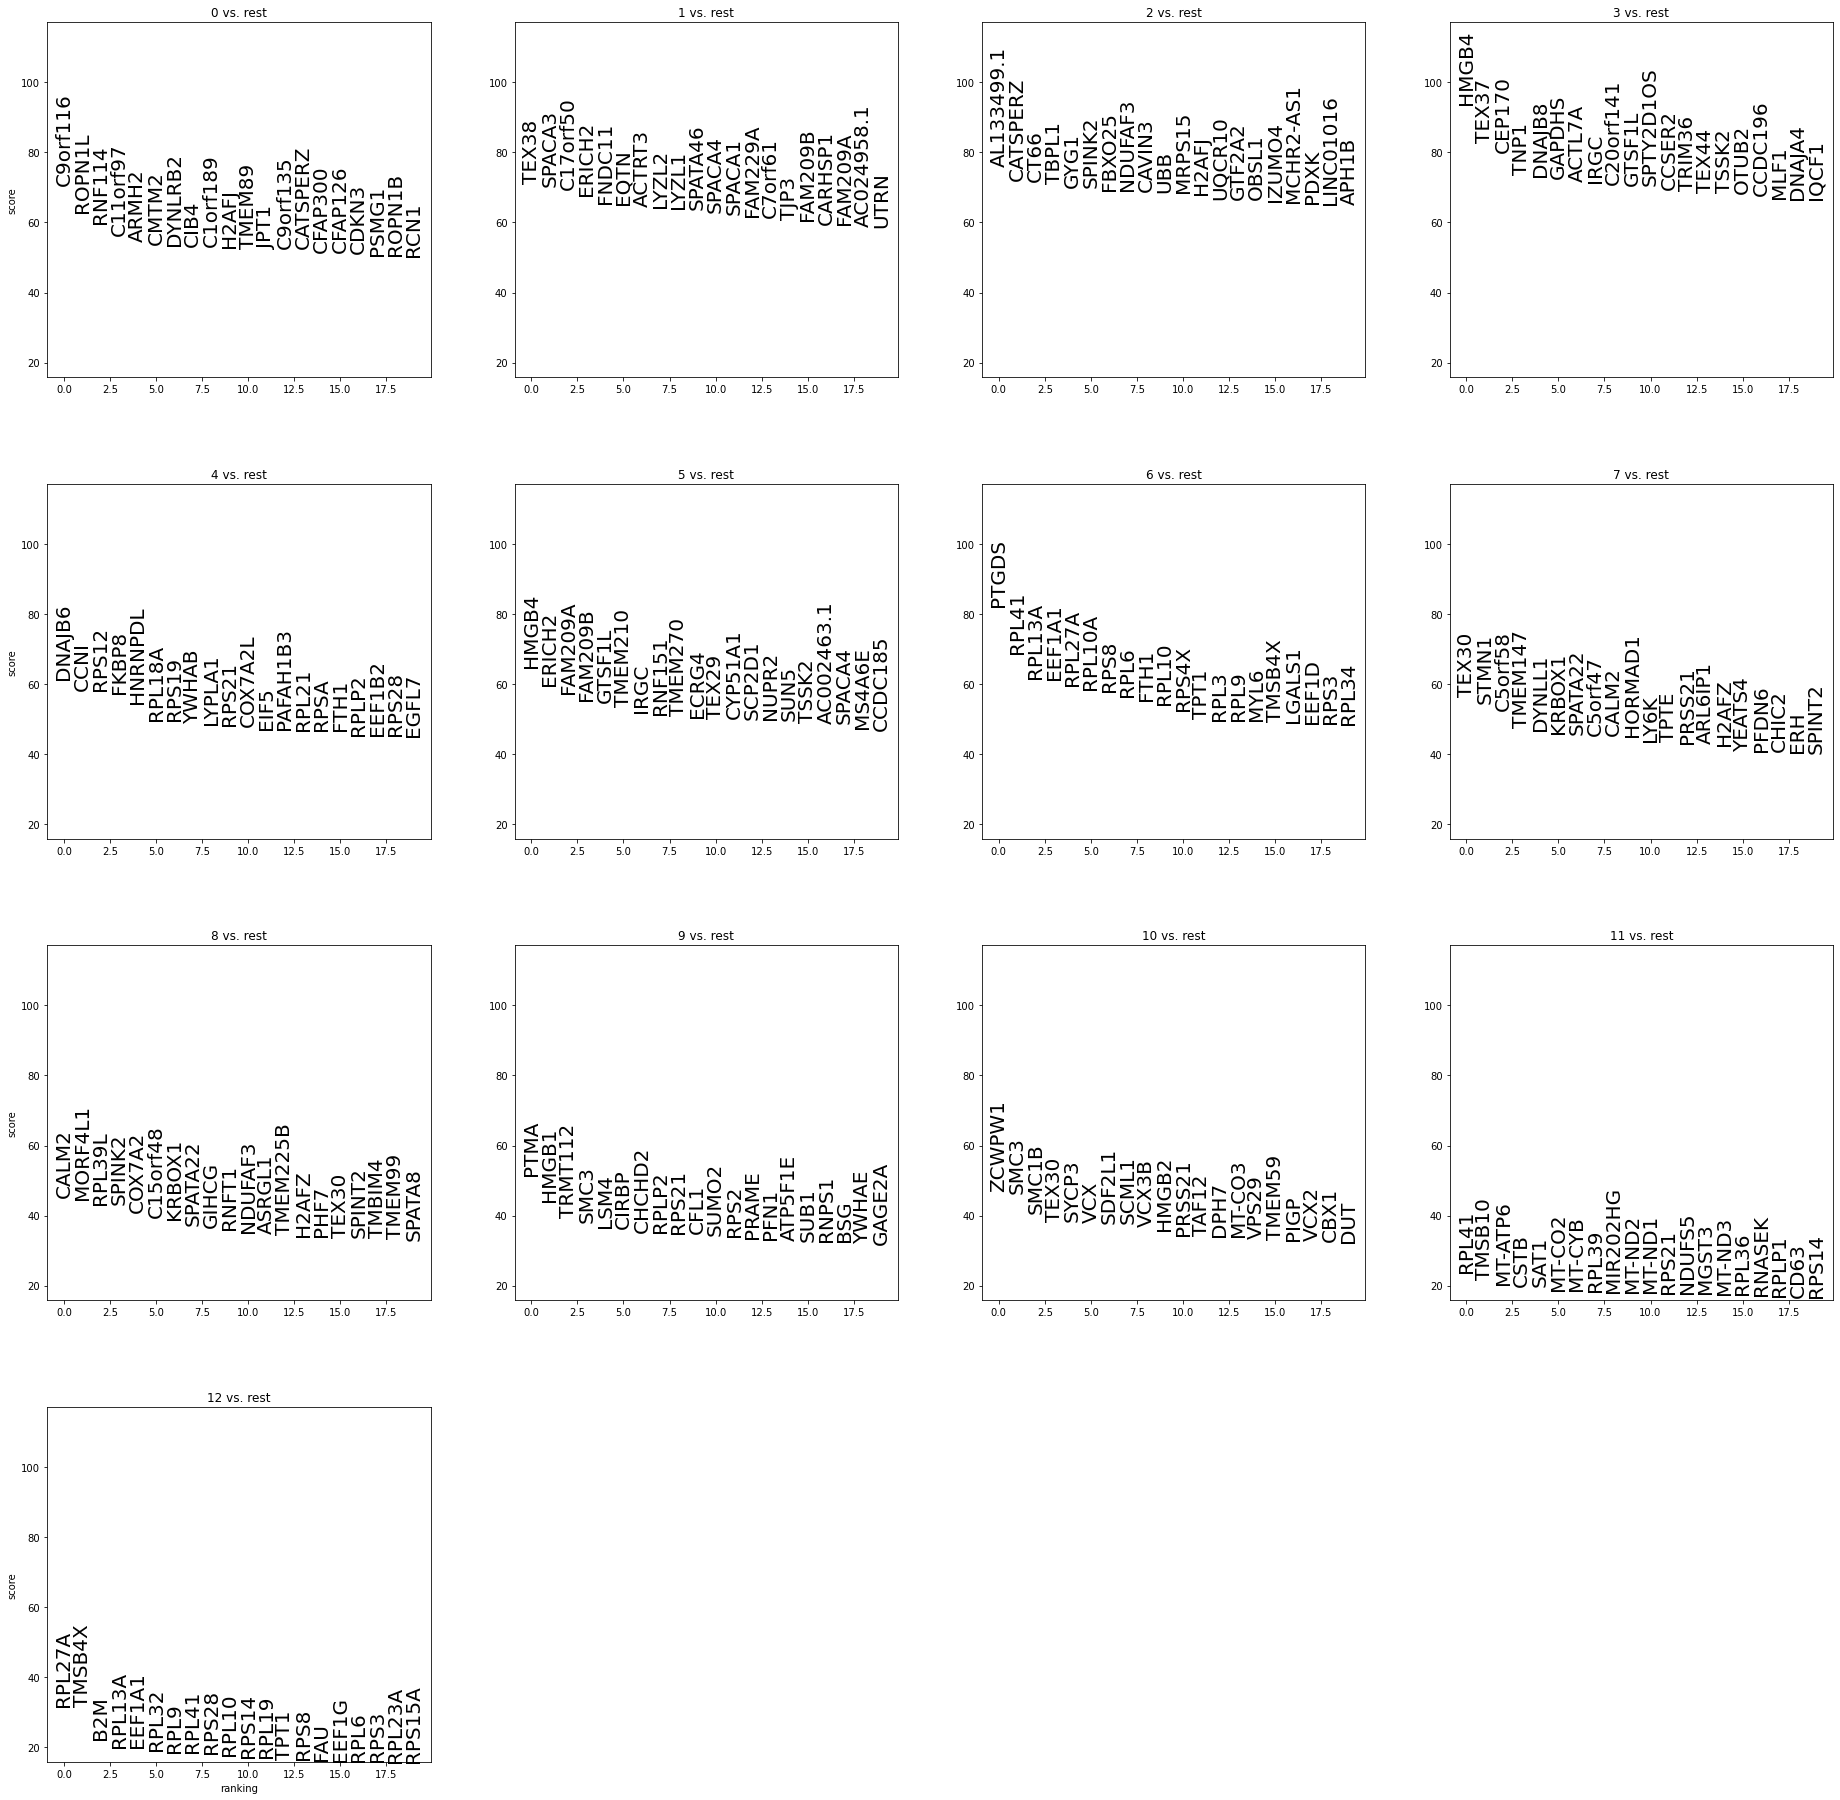

In [56]:
sc.pl.rank_genes_groups(sample, groupby='leiden', key='DE_leiden', fontsize=20)

In [57]:
markers = dict() #make an empty dictionary
### SPERMATOCYTOGENESIS
markers['SpermatogoniaA'] = ['ID4']
markers['SpermatogoniaB'] = ['MKI67','DMRT1','STRA8'] 
markers['SpermatocytesI'] = ['MEIOB','SYCP1','TEX101']
markers['SpermatocytesII'] = ['PIWIL1','SPATA16','CLGN']
### SPERMIOGENESIS
markers['Round.Spt'] = ['SPATA9','SPAM1'] #Round spermatids
markers['Elong.Spt'] = ['PRM1','PRM2','PRM3','AKAP4'] #Elongated spermatids
### SOMATIC CELLS
markers['Sertoli'] = ['VIM','CTSL']
markers['Macroph'] = ['CD163']
markers['Leydig'] = ['CFD']
markers['Endothelial'] = ['CD34']
markers['Myoid'] = ['ACTA2']

plt.rcParams['figure.figsize'] = (6,6) #reduce figure size

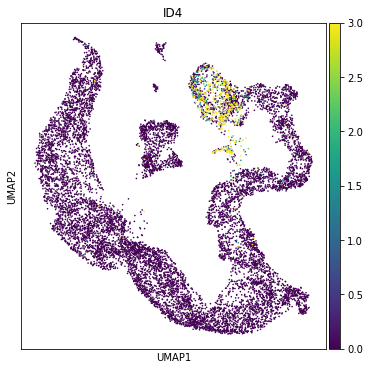

In [30]:
sc.plotting.umap(sample, color=markers['SpermatogoniaA'], vmin=0, vmax=3)

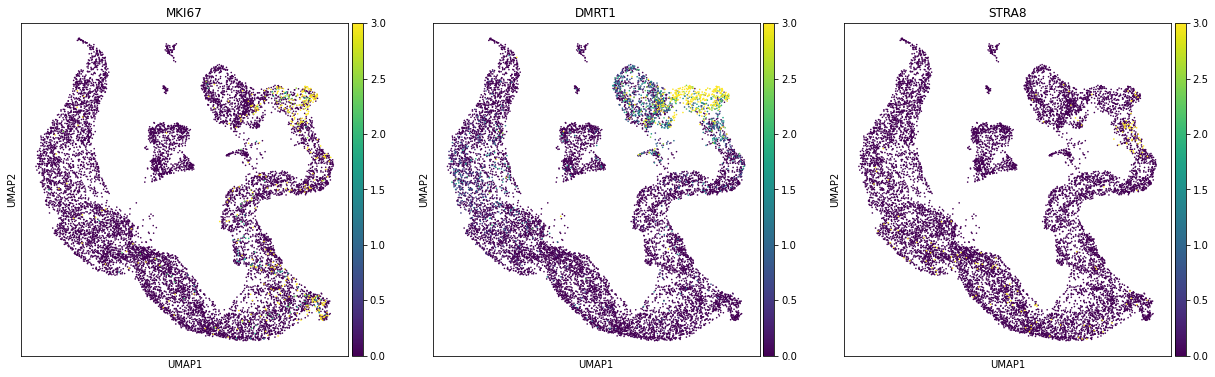

In [29]:
sc.plotting.umap(sample, color=markers['SpermatogoniaB'], vmin=0, vmax=3)

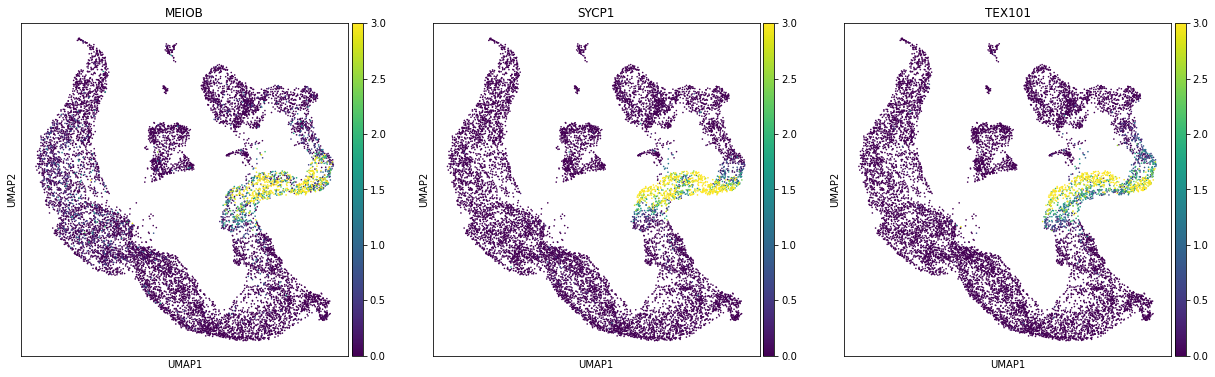

In [35]:
sc.plotting.umap(sample, color=markers['SpermatocytesI'], vmin=0, vmax=3)

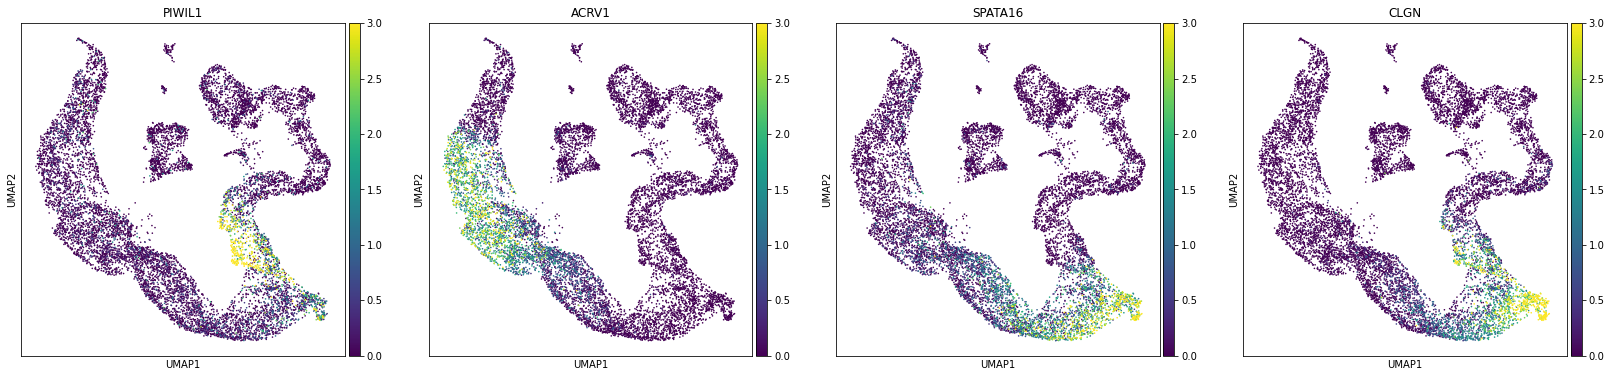

In [36]:
sc.plotting.umap(sample, color=markers['SpermatocytesII'], vmin=0, vmax=3)

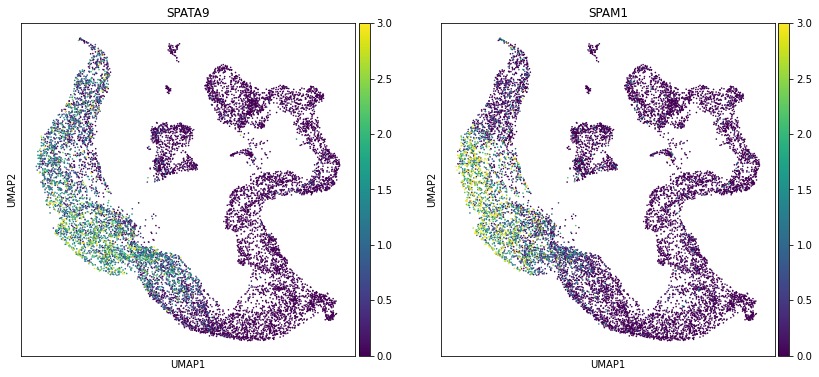

In [38]:
sc.plotting.umap(sample, color=markers['Round.Spt'], vmin=0, vmax=3)

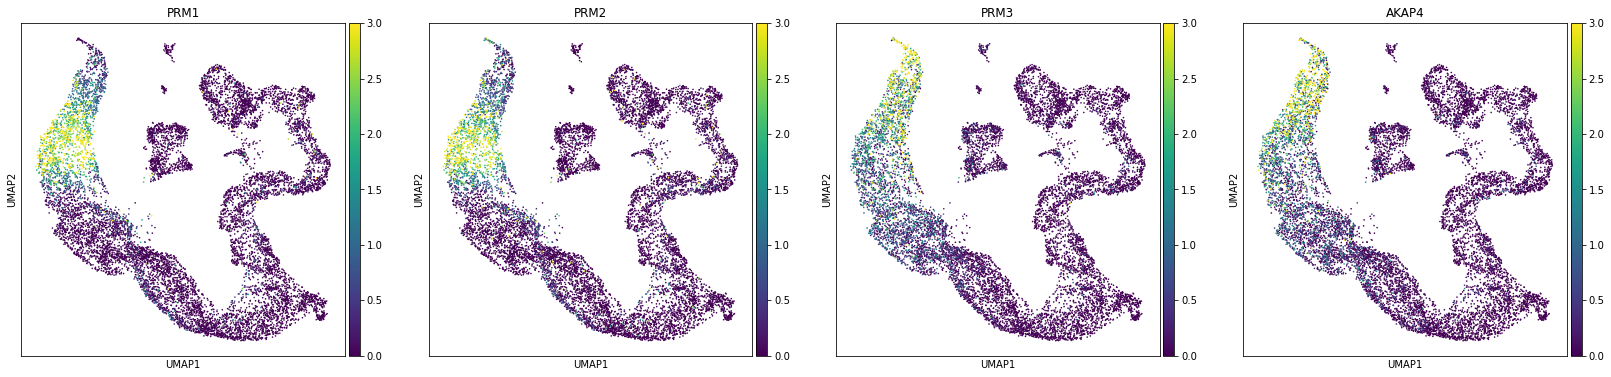

In [41]:
sc.plotting.umap(sample, color=markers['Elong.Spt'], vmin=0, vmax=3)

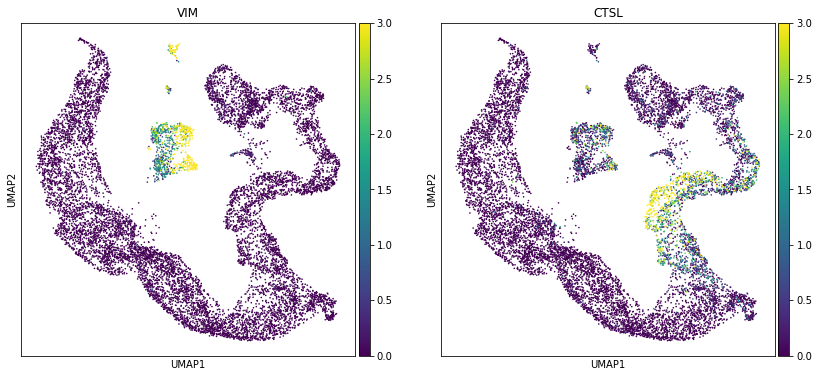

In [42]:
sc.plotting.umap(sample, color=markers['Sertoli'], vmin=0, vmax=3)

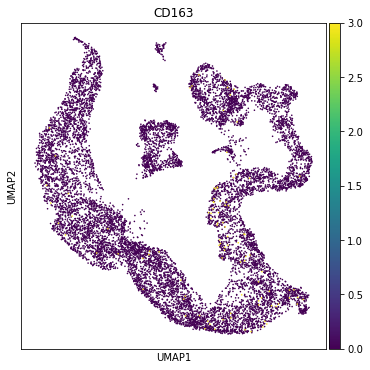

In [45]:
sc.plotting.umap(sample, color=markers['Macroph'], vmin=0, vmax=3)

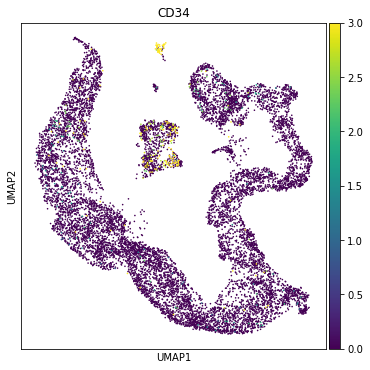

In [46]:
sc.plotting.umap(sample, color=markers['Endothelial'], vmin=0, vmax=3)

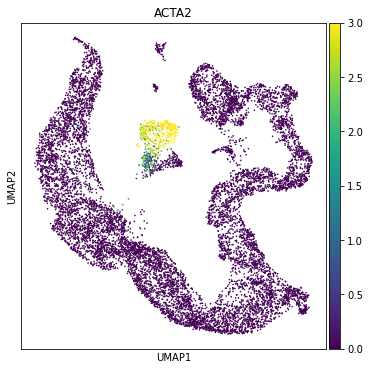

In [47]:
sc.plotting.umap(sample, color=markers['Myoid'], vmin=0, vmax=3)

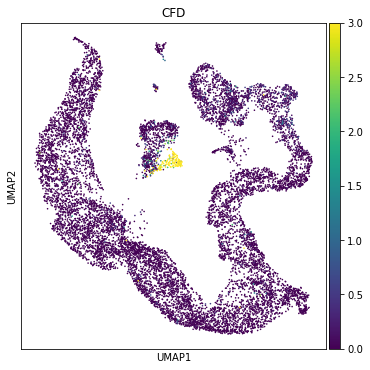

In [48]:
sc.plotting.umap(sample, color=markers['Leydig'], vmin=0, vmax=3)

In [58]:
sample=sample[sample.obs['leiden']!='11'].copy()

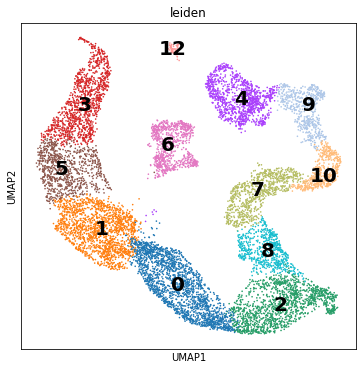

In [61]:
sc.plotting.umap(sample, color=['leiden'], legend_loc='on data', legend_fontsize=20)

In [124]:
sc.tl.leiden(sample, resolution=.1, restrict_to=('leiden',['6']), key_added='leiden_2')

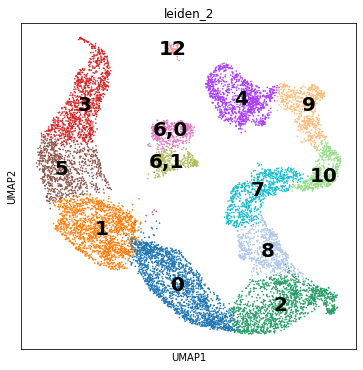

In [125]:
sc.plotting.umap(sample, color=['leiden_2'], legend_loc='on data', legend_fontsize=20)

In [ ]:
eptotene spermatocytes: PRSS50, SYCE2, Gm960; Zygotene spermatocytes: LY6K, SYCP1, TEXT101; Pachytene spermatocytes: CLGN, PIWIL1, SPATA16. 

In [98]:
markers['Leptotene'] = ['SYCE2']
markers['Zygotene'] = ['LY6K', 'SYCP1']
markers['Pachytene'] = ['CLGN', 'PIWIL1', 'SPATA16']
markers['Diplotene'] = ['OVOL2']

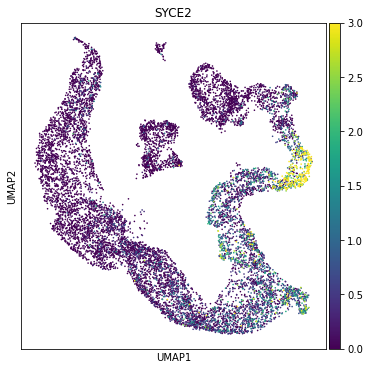

In [90]:
sc.plotting.umap(sample, color=markers['Leptotene'], vmin=0, vmax=3)

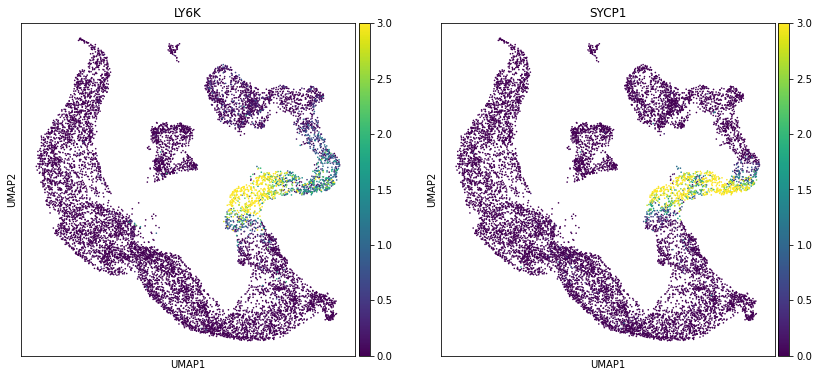

In [93]:
sc.plotting.umap(sample, color=markers['Zygotene'], vmin=0, vmax=3)

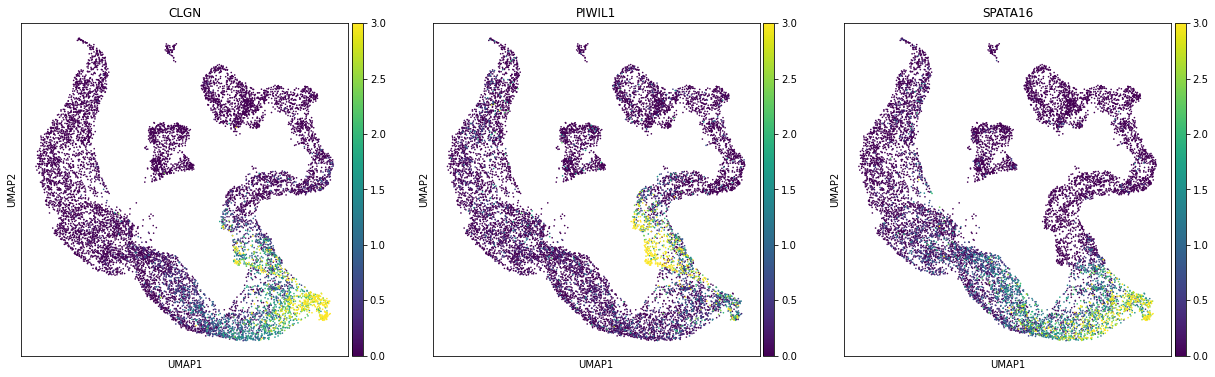

In [94]:
sc.plotting.umap(sample, color=markers['Pachytene'], vmin=0, vmax=3)

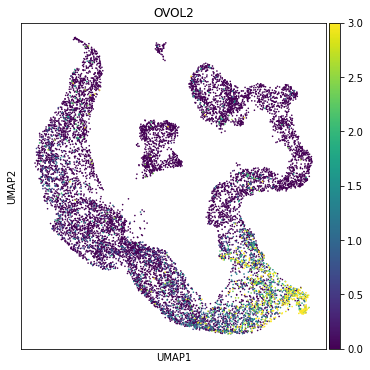

In [99]:
sc.plotting.umap(sample, color=markers['Diplotene'], vmin=0, vmax=3)

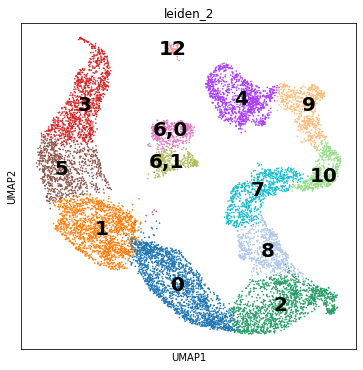

In [149]:
sc.plotting.umap(sample, color=['leiden_2'], legend_loc='on data', legend_fontsize=20)

In [126]:
sample.obs['leiden_2'].cat.categories

Index(['0', '1', '2', '3', '4', '5', '6,0', '6,1', '7', '8', '9', '10', '12'], dtype='object')

In [167]:
clusters = pd.Categorical(sample.obs['leiden_2'])

In [168]:
clusters.categories

Index(['0', '1', '2', '3', '4', '5', '6,0', '6,1', '7', '8', '9', '10', '12'], dtype='object')

In [169]:
clusters=clusters.rename_categories(['Round.Spt.1', 'Round.Spt.2', 'Diplotene', 'Elong.Spt.1', 'Spg.A', 
                                     'Elong.Spt.2', 'Myoid', 'Leydig', 'Zygotene', 'Pachytene', 
                             'Spg.B', 'Leptotene', 'Endothelial', ])

In [170]:
sample.obs['clusters']=clusters.copy()

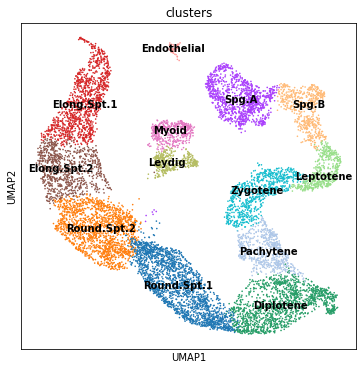

In [171]:
sc.plotting.umap(sample, color=['clusters'], legend_loc='on data')

In [172]:
sample.write('../data/notebooks_data/sample_123.filt.norm.clst.h5ad')

**UNTIL HERE UNTIL HERE UNTIL HERE UNTIL HERE UNTIL HERE**

In [278]:
#R inputs for MAST
adata2 = adata_flt.copy()
adata2.X = adata2.layers['SCtransformed']
adata2 = adata2[:,adata2.var['HVG_5K']].copy()
rawMatrix = np.array( adata2.X.T )

In [279]:
variables = adata2.var.copy()
observations = adata2.obs.copy()

In [280]:
rawMatrix

array([[-0.32046478, -0.15742199,  3.22790889, ..., -0.27712914,
         2.02980852, -0.29329394],
       [-0.2479883 , -0.11131889, -0.20838122, ..., -0.23713558,
        -0.30827536, -0.24871766],
       [-0.26286558, -0.12299894, -0.22156627, ..., -0.23209595,
        -0.29962473, -0.24320488],
       ...,
       [-0.33513276, -0.23141616, -0.30290552, ...,  0.36362305,
        -0.40724655, -0.50350072],
       [-0.33333527, -0.22386978, -0.29870833, ..., -0.37871612,
         0.55336786, -0.39454316],
       [-0.29185006, -0.16946252, -0.25141274, ..., -0.3809053 ,
        -0.49595626, -0.4011299 ]])

Relationship between batches, total counts, percentage of mitocondrial genes and gene counts. We look at the distribution of the $R^2$ values for a linear model involving a feature at the time (number of counts, batch, ...)

In [281]:
%%R -i rawMatrix -i observations -i variables

library(MAST)

#Set up the CellDataSet data structure
pd <- DataFrame(data = observations)
fd <- DataFrame(data = variables)
colnames(rawMatrix) <- rownames(pd) #cell names
rownames(rawMatrix) <- rownames(fd) #gene names

In [237]:
observations.columns

Index(['batch', 'doublet_scores', 'log1p_n_genes_by_counts',
       'log1p_total_counts', 'n_counts', 'n_genes', 'n_genes_by_counts',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes',
       'percent_mito', 'predicted_doublets', 'total_counts', 'S_score',
       'G2M_score', 'phase', 'leiden_0.4'],
      dtype='object')

In [282]:
%%R 
#create sc experiment (DESEQ or SCATER object). MAST need logs and so we make the log here. 
sce_dge <- SingleCellExperiment(assays = list(counts = as.matrix(rawMatrix) ), colData = observations)

In [283]:
%%R
#convert sc experiment to sc assay (MAST object). check_sanity=FALSE avoids looking for log or not in the data.
sca_dge <- SceToSingleCellAssay(sce_dge, class = "SingleCellAssay", check_sanity = FALSE)

In [284]:
%%R
clusters=colData(sca_dge)$leiden_0.4
for(i in unique(clusters)){
    ##create one-hot encoding for each cluster
    name = paste("leiden_0.4_CL",i,sep='')
    colData(sca_dge)[name] = sapply(clusters, function(x){
                           if(x==i)
                               return(paste("CL",i,sep=''))
                           else
                               return("other") 
                            })
    ##relevel each factor to be able to test one cluster against the rest of the cells
    clst <- unlist(colData(sca_dge)[name])
    clst <- as.factor( clst )
    clst <- relevel(clst,"other")
    colData(sca_dge)[name]<-clst    
}

In [ ]:
%%R
zlmCond_ent = list()

for(i in unique(clusters)){
    naming = paste("~ leiden_0.4_CL",i,sep='')
    F = as.formula(paste(naming," batch + total_counts + n_genes",sep=''))
    zlmCond_ent[[as.numeric(i)+1]] <- zlm(formula = F, sca=sca_dge, parallel=TRUE)
}

In [273]:
%%R
names(colData(sca_dge))

 [1] "batch"                       "doublet_scores"             
 [3] "log1p_n_genes_by_counts"     "log1p_total_counts"         
 [5] "n_counts"                    "n_genes"                    
 [7] "n_genes_by_counts"           "pct_counts_in_top_100_genes"
 [9] "pct_counts_in_top_200_genes" "pct_counts_in_top_500_genes"
[11] "pct_counts_in_top_50_genes"  "percent_mito"               
[13] "predicted_doublets"          "total_counts"               
[15] "S_score"                     "G2M_score"                  
[17] "phase"                       "leiden_0.4"                 
[19] "wellKey"                     "leiden_0.4_CL1"             
[21] "leiden_0.4_CL3"              "leiden_0.4_CL0"             
[23] "leiden_0.4_CL2"              "leiden_0.4_CL5"             
[25] "leiden_0.4_CL6"              "leiden_0.4_CL4"             
[27] "leiden_0.4_CL7"             


In [ ]:
%%R
summaryCond_ent = list()
summaryDt_ent = list()

for(i in unique(clusters)){
    ##do the test using the one-hot encoding for the cluster of interest
    naming = paste("leiden_0.4_CL",i,"CL",i,sep='')
    summaryCond_ent[[as.numeric(i)+1]] <- summary(zlmCond_ent[[as.numeric(i)+1]], doLRT=naming)
    
    ##cut genes, logFC and pvalues out of the summary data table
    summaryDt_ent[[as.numeric(i)+1]] <- summaryCond_ent[[as.numeric(i)+1]]$datatable
}

In [ ]:
%%R
result_ent = list()
ent_de = list()

for(i in unique(clusters)){
    naming = paste("leiden_0.4_CL",i,"CL",i,sep='')
    result_ent[[as.numeric(i)+1]] <- merge(summaryDt_ent[[as.numeric(i)+1]][contrast==naming & component=='H',.(primerid, `Pr(>Chisq)`)], #P-vals
                 summaryDt_ent[[as.numeric(i)+1]][contrast==naming & component=='logFC', .(primerid, coef)],
                 by='primerid') #logFC coefficients
    
    ##keep only significant genes and order by FDR. 
    ##Only veryvery low FDR seem for truly DE genes (look at some UMAP plots to doublecheck)
    result_ent[[as.numeric(i)+1]][,FDR:=p.adjust(`Pr(>Chisq)`, 'fdr')]
    ent_de[[as.numeric(i)+1]] = result_ent[[as.numeric(i)+1]][result_ent[[as.numeric(i)+1]]$FDR<0.1 & result_ent[[as.numeric(i)+1]]$coef>0.1,, drop=F]
    ent_de[[as.numeric(i)+1]] = ent_de[[as.numeric(i)+1]][order(ent_de[[as.numeric(i)+1]]$FDR),]
}

In [ ]:
%%R -o ent_de
ent_de[[6]]

In [ ]:
ent_de[0].iloc[0:30,:]

Write a pandas dataframe for all the clusters

In [139]:
x=pd.DataFrame(ent_de[0])
x['cluster']='0'
for i in np.unique(adata_flt.obs['leiden_0.4']):
    if i!='0':
        y=pd.DataFrame(ent_de[int(i)])
        y['cluster']=i
        x=x.append(y)

In [212]:
adata_flt.uns['MAST_DGE'] = x

In [213]:
adata_flt.uns['MAST_DGE']

primerid     Pr(>Chisq)      coef            FDR cluster
1       AP1B1   0.000000e+00  1.262687   0.000000e+00       0
2       HMGB4   0.000000e+00  1.511730   0.000000e+00       0
3      CCSER1  1.525415e-239  0.389593  2.542359e-236       0
4        PRM3  4.743970e-229  0.307001  5.929962e-226       0
5       MED15  5.189816e-209  0.116263  5.189816e-206       0
...       ...            ...       ...            ...     ...
1110    PARP1   3.446680e-03  0.008933   9.725394e-03       7
1111   ATP10B   3.480167e-03  0.004766   9.803286e-03       7
1112   RPL7L1   3.480072e-03  0.006925   9.803286e-03       7
1113      GSR   3.518627e-03  0.011600   9.886431e-03       7
1114   PFKFB3   3.516806e-03  0.019311   9.886431e-03       7

[7343 rows x 5 columns]

In [214]:
adata_flt.write('./filtering/adata_05.h5ad')

***CONTINUE FROM HERE***

In [140]:
dict_de = { i:np.array(ent_de[int(i)]['primerid'][0:99]) for i in np.unique(adata_flt.obs['leiden_0.4']) }

In [141]:
dict_de

{'0': array(['CCDC82', 'ERBB4', 'GSTM3', 'TBX22', 'ACSBG1', 'ARL15', 'TOX',
        'XLOC_075822', 'FHOD3', 'SRSF5', 'AKAP12', 'TACC1', 'NCOA2',
        'FAM13B', 'SRSF7', 'BBX', 'XLOC_090245', 'SLC41A1', 'NSMAF',
        'CAST', 'XLOC_070750', 'TCAF1', 'KIF5C', 'ENSNLEG00000001390',
        'ENSNLEG00000018475', 'RTL9', 'XLOC_027077', 'PNISR', 'EPB41L4A',
        'XLOC_010995', 'GPATCH2L', '16S-ribosomal-RNA', 'PTCH2', 'GCFC2',
        'NKTR', 'SELENOI', 'ND3', 'ND4', 'ND1', '12S-ribosomal-RNA',
        'CYTB', 'COX2', 'COX1', 'COX3'], dtype=object),
 '1': array(['ENSNLEG00000035946', 'ENSNLEG00000034545', 'ENSNLEG00000035354',
        'ENSNLEG00000036044', 'ENSNLEG00000033541', 'PLCZ1', 'XLOC_084926',
        'XLOC_050173', 'ENSNLEG00000034925', 'XLOC_082121', 'SCN3A',
        'XLOC_071559', 'XLOC_029862', 'ENSNLEG00000035665', 'P2RX3',
        'IGSF11', 'XLOC_076708', 'XLOC_024513', 'XLOC_048700',
        'XLOC_006731', 'STAT4', 'ZNF98', 'ENSNLEG00000026719', 'FDFT1',
        'ENSNL

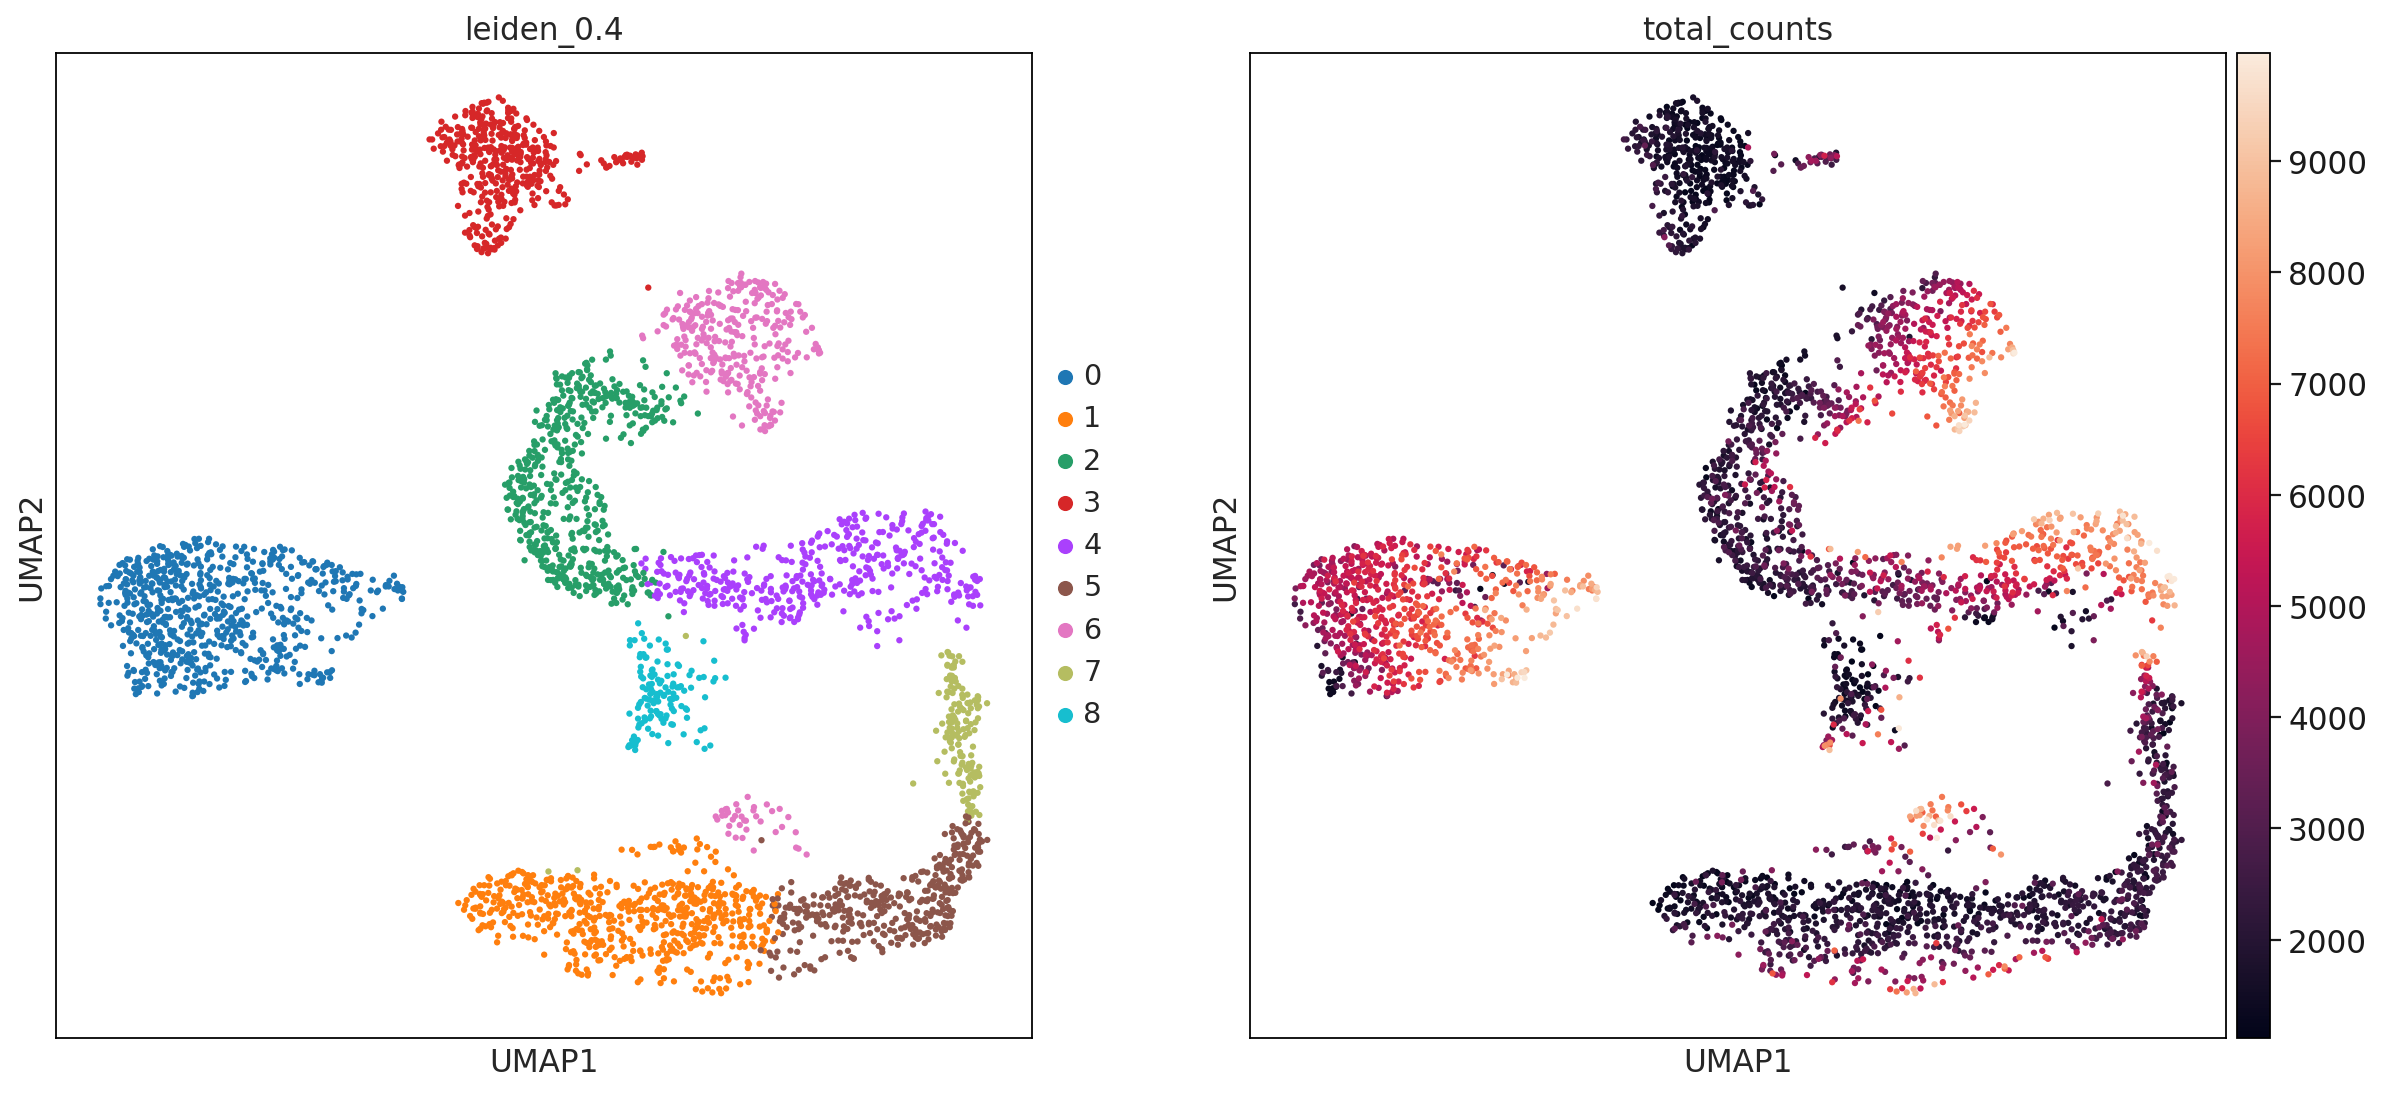

In [151]:
sc.pl.umap(adata_flt, color=['leiden_0.4','total_counts'])

In [152]:
sc.tl.rank_genes_groups(adata_flt, method="wilcoxon", groupby='leiden_0.4', use_raw=True)

ranking genes
    finished (0:00:08.51) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids


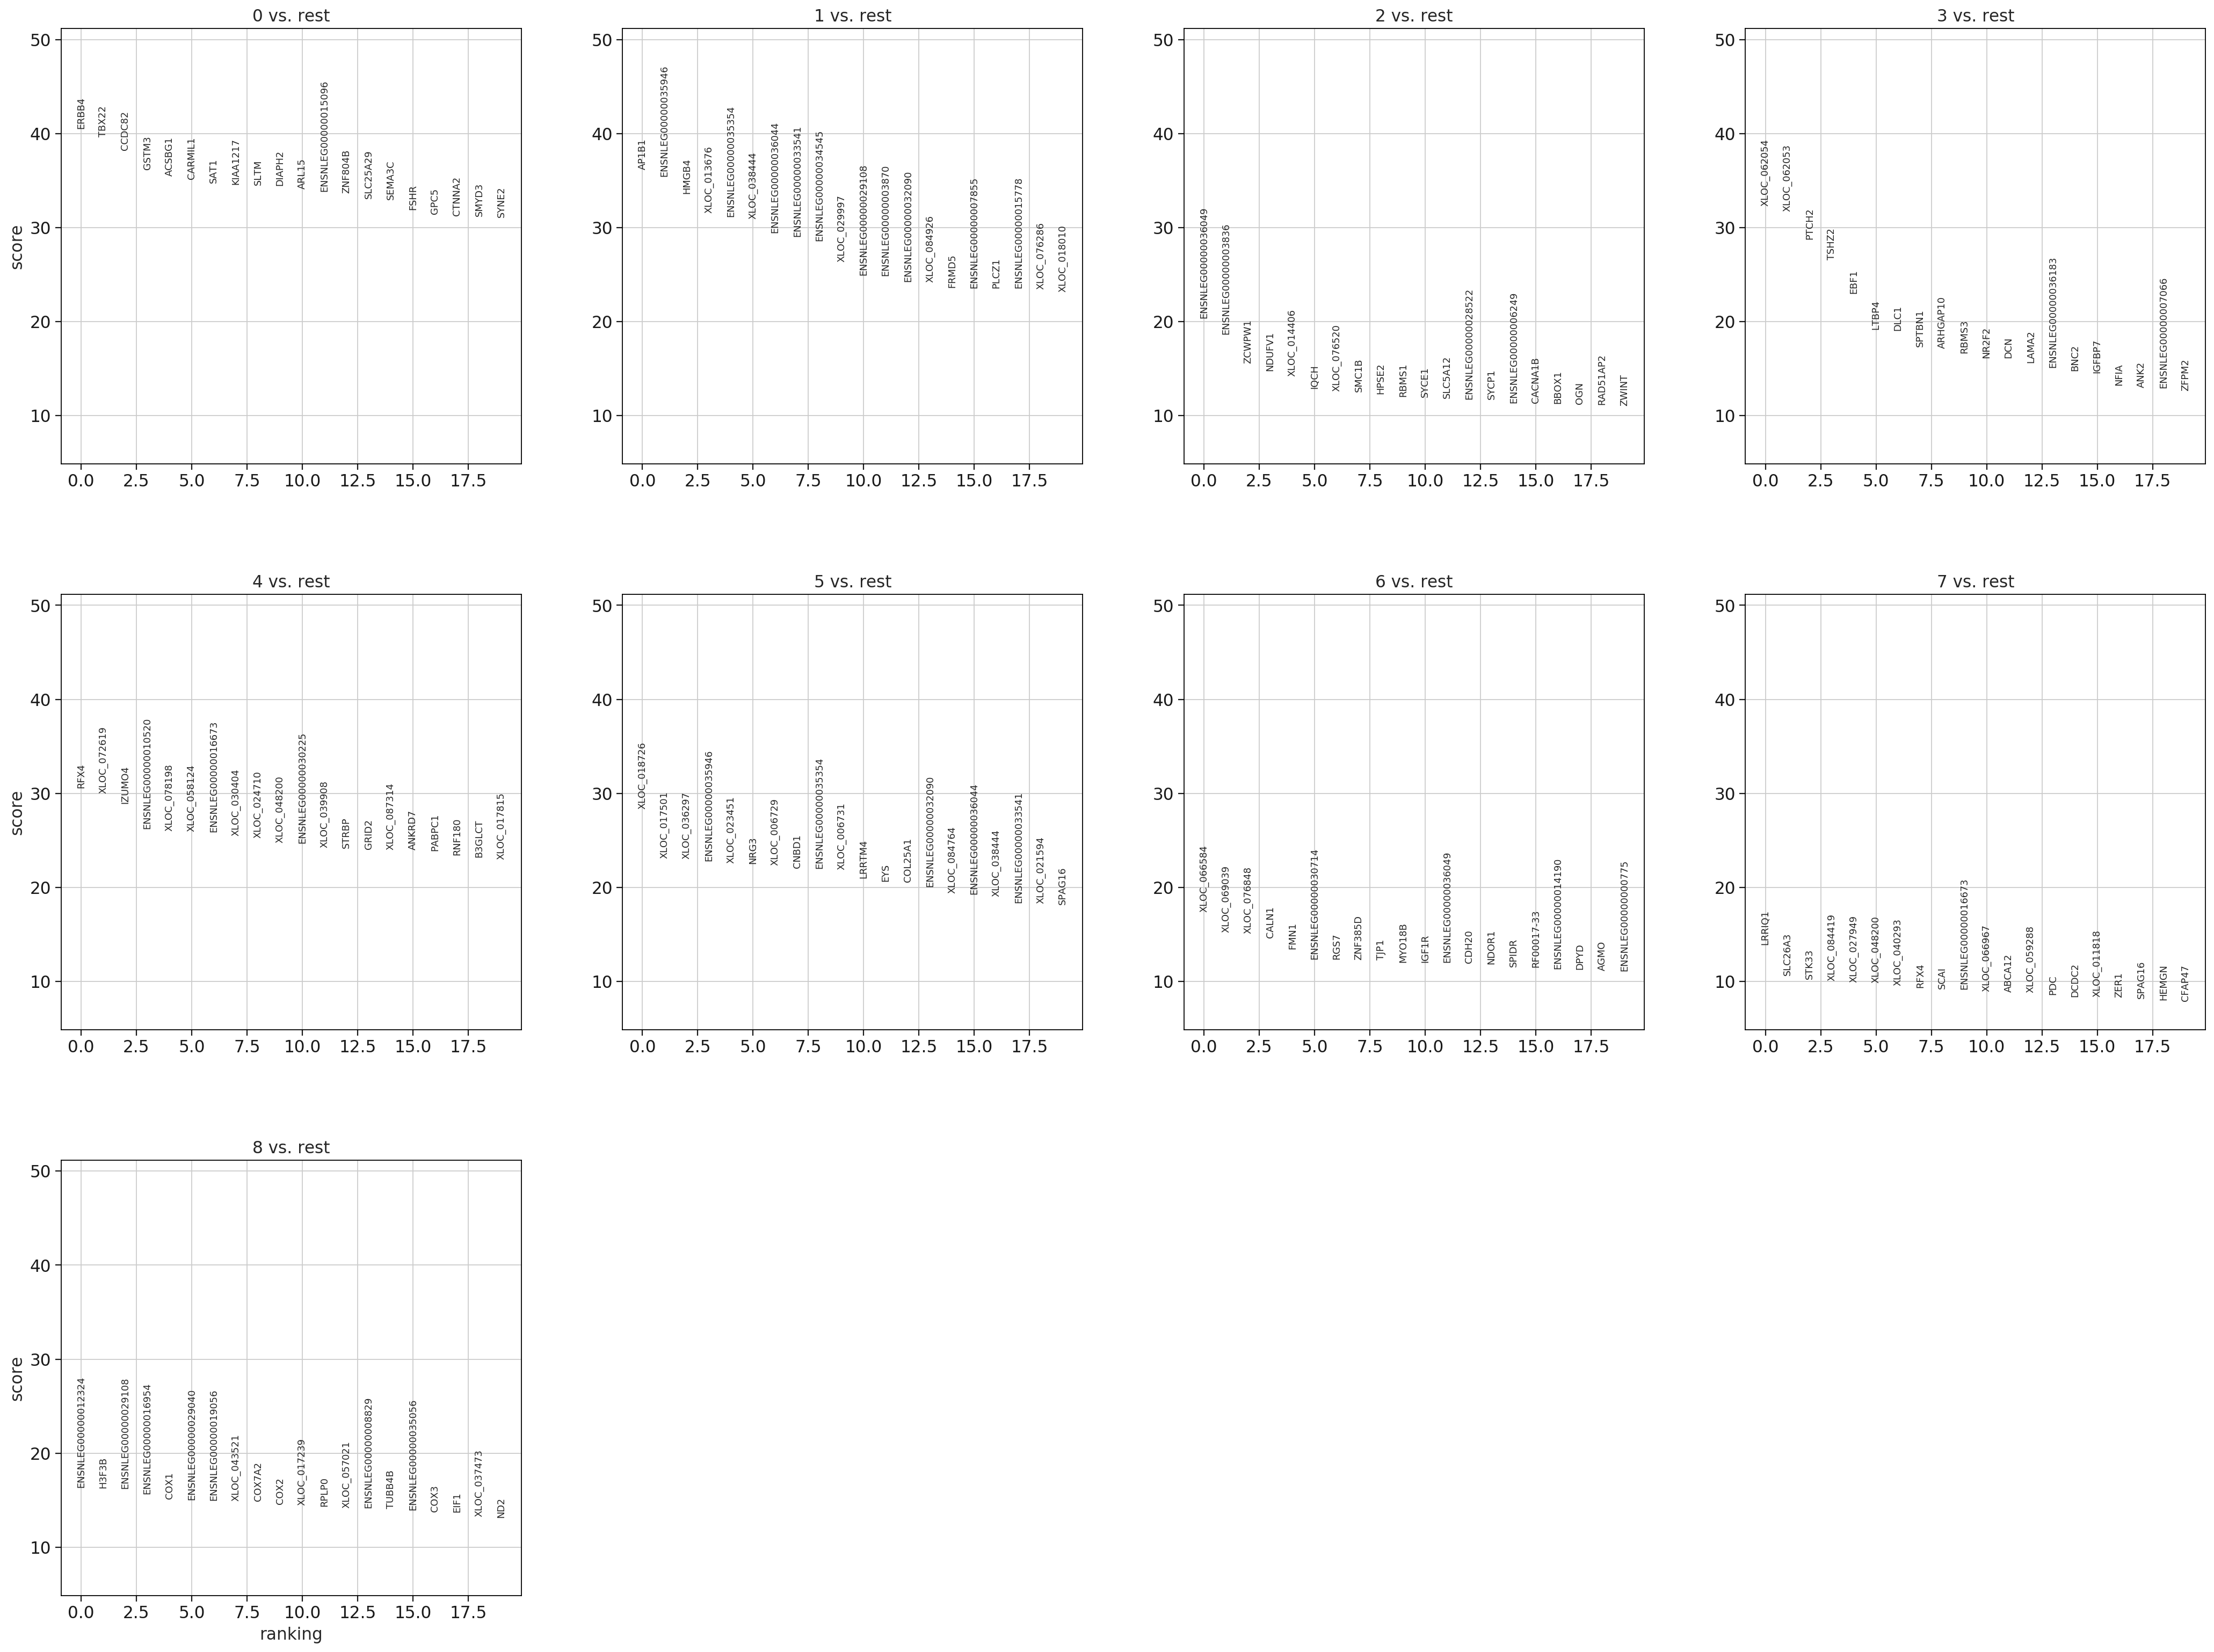

In [153]:
sc.pl.rank_genes_groups(adata_flt, groupby='leiden_0.4')

In [155]:
ent_de[1]

primerid     Pr(>Chisq)      coef            FDR
1   ENSNLEG00000035946   0.000000e+00  2.606469   0.000000e+00
2   ENSNLEG00000034545  5.004915e-236  1.765327  2.502457e-233
3   ENSNLEG00000035354  2.666450e-230  1.821621  8.888166e-228
4   ENSNLEG00000036044  4.128156e-224  1.770468  1.032039e-221
5   ENSNLEG00000033541  5.110187e-212  1.503806  1.022037e-209
6                PLCZ1  1.645539e-168  0.938103  2.742565e-166
7          XLOC_084926  2.656181e-164  1.095284  3.794544e-162
8          XLOC_050173  1.003245e-139  0.790064  1.254057e-137
9   ENSNLEG00000034925  8.837720e-125  0.576887  9.819689e-123
10         XLOC_082121  1.520588e-103  0.465916  1.520588e-101
11               SCN3A   4.503551e-76  0.368255   4.020902e-74
12         XLOC_071559   4.825082e-76  0.319540   4.020902e-74
13         XLOC_029862   1.320739e-75  0.397197   1.015953e-73
14  ENSNLEG00000035665   3.907135e-63  0.319231   2.790811e-61
15               P2RX3   1.751248e-61  0.137585   1.167499e-59
16              IGSF11   2.322740e-55  0.284601   1.366318e-53
17         XLOC_076708   5.715719e-52  0.112586   3.175399e-50
18         XLOC_024513   9.419609e-51  0.380976   4.709805e-49
19         XLOC_048700   3.814462e-44  0.140635   1.733846e-42
20         XLOC_006731   5.322318e-42  0.473276   2.314051e-40
21               STAT4   2.900658e-40  0.238157   1.208608e-38
22               ZNF98   2.402924e-39  0.181449   9.242017e-38
23  ENSNLEG00000026719   2.703752e-31  0.139413   8.721781e-30
24               FDFT1   8.422738e-27  0.134948   2.276416e-25
25  ENSNLEG00000030627   3.199789e-26  0.131898   7.999472e-25
26               ARMC3   1.188120e-25  0.179952   2.828858e-24
27         XLOC_033121   4.697556e-22  0.140690   1.043901e-20
28             TMEM168   2.852165e-21  0.109274   6.200360e-20
29         XLOC_083979   8.368233e-19  0.117771   1.549673e-17
30         XLOC_077869   4.569096e-09  0.101114   4.079550e-08
31              FAM13B   1.592556e-05  0.120980   7.845105e-05

In [154]:
idx = []
for i in clusterDict:
    if(i != 'Somatic'):
        idx.append(str(i))

print(idx)
dfHeat = pd.DataFrame(index=idx, columns=np.unique(adata_flt.obs['leiden_0.4']))      
    
dfHeat    
    
for i in clusterDict:
    if(i != 'Somatic'):
        for l in np.unique(adata_flt.obs['leiden_0.4']):
            dfHeat.loc[str(i),l]=np.sum(np.in1d( dict_de[l], clusterDict[i] ))

NameError: name 'clusterDict' is not defined

In [93]:
dfHeat

0  1  2  3  4  5  6
Differentiated_Spermatogonia     0  0  0  0  0  0  0
Early_spermatids                 6  2  0  3  0  1  0
Endothelial                      0  0  0  0  0  0  0
Late_spermatids                 12  0  0  6  1  1  1
Leydig                           0  0  0  0  1  1  1
Leydig_fetal                     0  0  0  0  0  0  0
Macrophages                      0  0  0  0  0  0  0
Meiosis                          0  2  0  0  0  0  0
Myoid                            0  0  0  0  0  0  1
PGC                              0  0  0  0  0  0  0
PTM                              0  0  0  0  0  0  1
PTM_fetal                        0  0  0  0  0  0  0
PreSG                            0  1  0  0  0  0  0
Progenitors                      0  0  0  0  0  0  0
SSC                              0  1  0  0  0  0  1
Sertoli                          1  0  0  0  2  3  1
Sertoli_pre_pubertal             0  0  0  0  1  0  0
Sperm                            0  0  0  0  0  0  0
Spermatids                       5  2  0  0  1  1  0
Spermatocytes                    1  5  0  0  1  2  0
Spermatogonia                    0  7  0  1  9  1  1
Undifferentiated_Spermatogonia   0  0  0  0  0  0  1

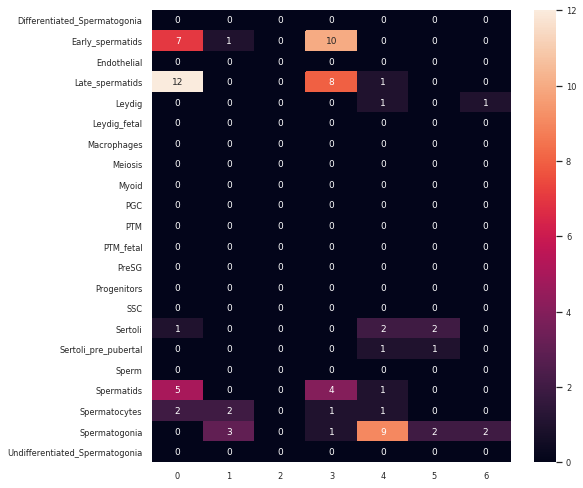

In [73]:
sns.set(font_scale=.75)
sns.heatmap(dfHeat, annot=True,)

In [225]:
adata_flt.rename_categories('leiden_0.4', ['Std/Late_Std','Spg/Spc/Meio','Early_Std','Spc/Early_Std','Spg','SSC','SSC/UndSpg','ND'])

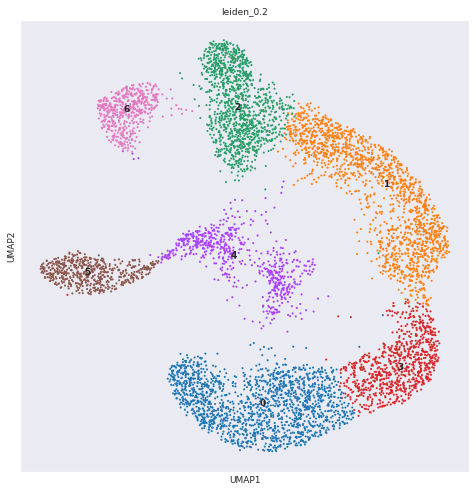

In [69]:
sc.pl.umap(adata_flt, color=['leiden_0.2'], legend_loc='on data')

In [144]:
sc.tl.rank_genes_groups(adata_flt, method="logreg", groupby='leiden_0.2', use_raw=False)

ranking genes
    finished (0:00:38.02) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids



In [77]:
ent_de[2]

primerid    Pr(>Chisq)      coef           FDR
1     CST3  6.546351e-18  0.154088  4.709605e-17
2    RPS15  2.143991e-09  0.102804  7.824783e-09

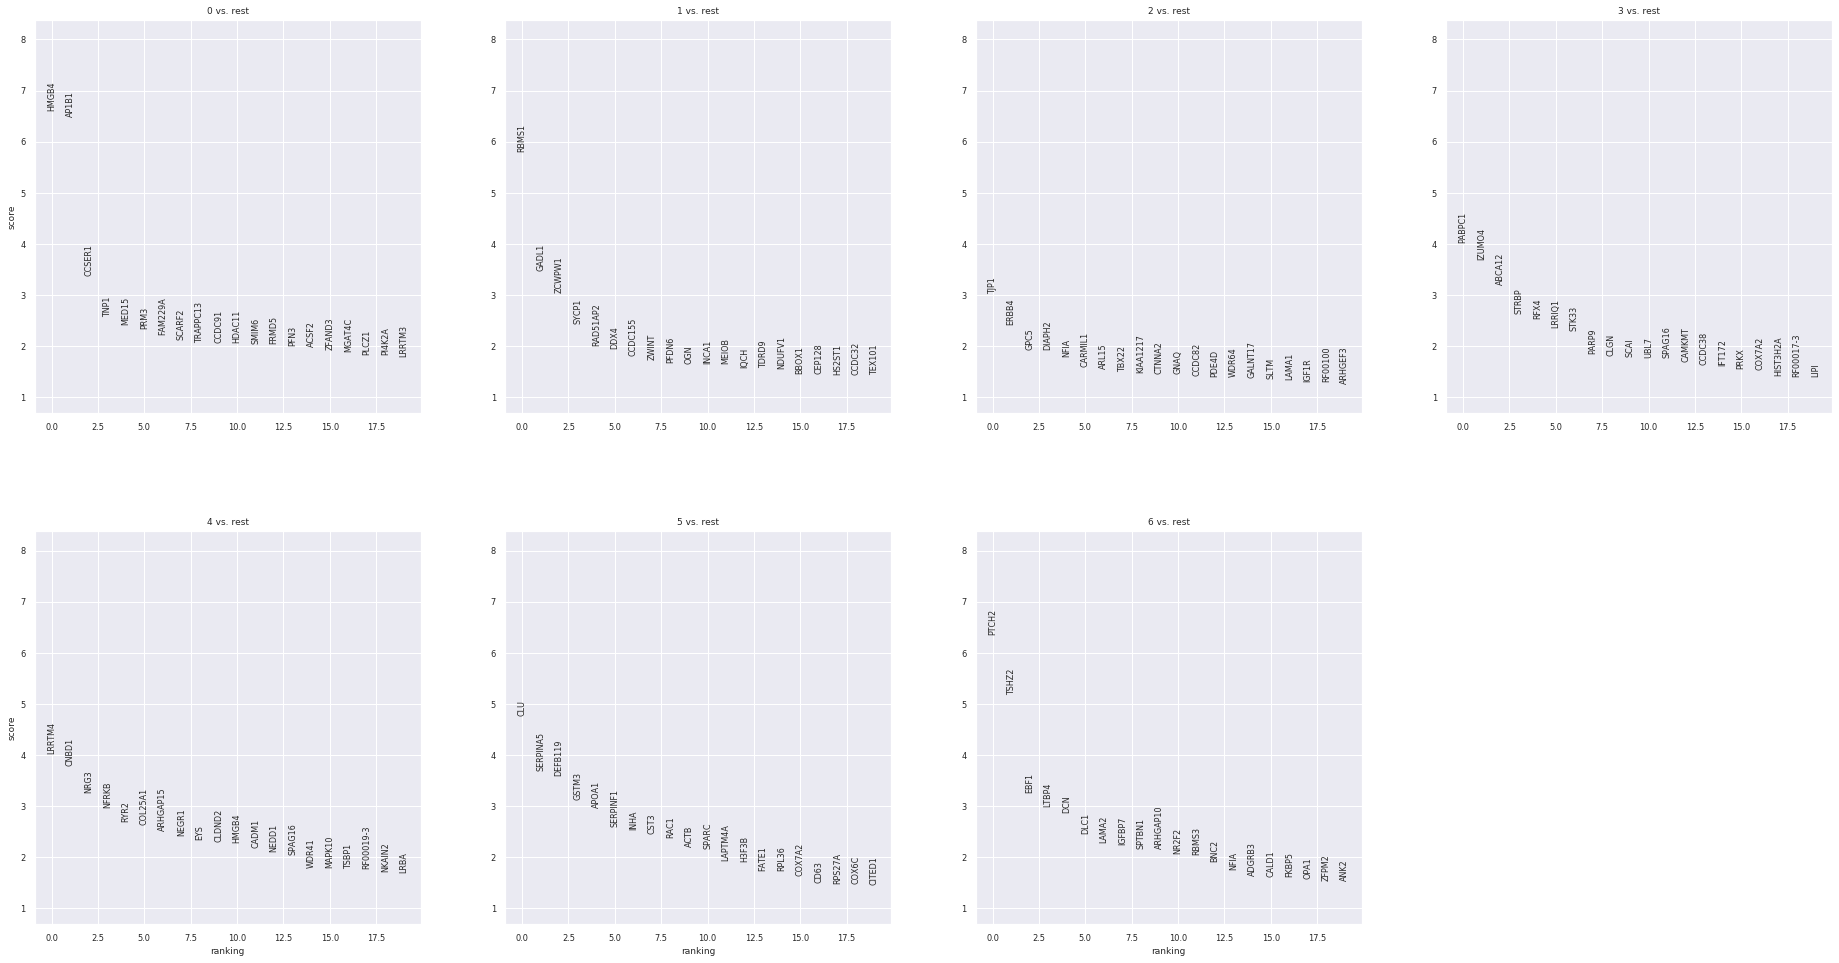

In [145]:
sc.pl.rank_genes_groups(adata_flt, groupby='leiden_0.2')

In [129]:
 import string

In [ ]:
'../../scRNA/analysisGuo/Markers.txt'

In [62]:
with open('../../scRNA/analysisGuo/Markers.txt','r') as f: #read names both lower and upper case
    names=[x.strip().split('\t')[0] for x in f]
with open('../../scRNA/analysisGuo/Markers.txt','r') as f:    
     types=[x.strip().split('\t')[1] for x in f]
with open('../../scRNA/analysisGuo/Markers.txt','r') as f:
    names2=[x.strip().split('\t')[0].upper() for x in f]  

In [89]:
del names[0] #remove headers
del names2[0]
del types[0]

typesNew = np.concatenate( (np.array(types), np.array(types)) ) #put vectors together and find which genes are in our data
namesNew = np.concatenate( (np.array(names),np.array(names2)) )

In [90]:
idx = np.in1d(namesNew, adata_flt.var_names)
typesNew = typesNew[idx]
namesNew = namesNew[idx]

forTypes = np.unique(typesNew)
clusterDict = dict()
for tt in forTypes:
    idx = np.in1d( typesNew, tt )
    clusterDict[str(tt)] = np.array(namesNew)[idx]


In [138]:
adata_flt.uns['test'] = dict_de

In [140]:
cell_annotation = sc.tl.marker_gene_overlap(adata_flt, clusterDict, key='dict_de')

ValueError: Could not find marker gene data. Please run `sc.tl.rank_genes_groups()` first.

In [ ]:
sc.pl.umap(adata_flt, color=['leiden_0.4','C19orf84','ZNF428','RAC3','MAGEB2','RAC3','UTF1'])

In [ ]:
sc.tl.rank_genes_groups(adata_flt, groupby='leiden_0.4', key_added='rank_genes_0.4', method='wilcoxon', n_genes=100, use_raw=True, batch_key='batch')
sc.tl.rank_genes_groups(adata_flt, groupby='leiden_0.5', key_added='rank_genes_0.5', method='wilcoxon', n_genes=100, use_raw=True, batch_key='batch')
sc.tl.rank_genes_groups(adata_flt, groupby='leiden_0.6', key_added='rank_genes_0.6', method='wilcoxon', n_genes=100, use_raw=True, batch_key='batch')

In [ ]:
sc.tl.rank_genes_groups(adata_flt, groupby='leiden_0.4', key_added='rank_genes_0.4', method='wilcoxon', n_genes=30, use_raw=False)

In [ ]:
clusterAssign(adata=adata_flt, marker_file="./Markers.txt", cluster_key='leiden_0.4', gene_rank_key='rank_genes_0.4', remove_somatic=True, rename=False, normalize='None')

In [ ]:
clusterAssign(adata=adata_flt, marker_file="./Markers.txt", cluster_key='leiden_0.5', gene_rank_key='rank_genes_0.5', remove_somatic=True, rename=False, normalize='data')

In [ ]:
clusterAssign(adata=adata_flt, marker_file="./Markers.txt", cluster_key='leiden_0.6', gene_rank_key='rank_genes_0.6', remove_somatic=True, rename=False, normalize='None')

In [ ]:
clusterAssign(adata=adata_flt, marker_file="./Markers.txt", cluster_key='leiden_0.4', gene_rank_key='rank_genes_0.4', remove_somatic=True, rename=True, normalize='data')

In [ ]:
clusterAssign(adata=adata_flt, marker_file="./Markers.txt", cluster_key='leiden_0.5', gene_rank_key='rank_genes_0.5', remove_somatic=True, rename=True, normalize='data')

In [ ]:
clusterAssign(adata=adata_flt, marker_file="./Markers.txt", cluster_key='leiden_0.6', gene_rank_key='rank_genes_0.6', remove_somatic=True, rename=True, normalize='data')

In [ ]:
plt.rcParams['figure.figsize']=(8,8)
sc.pl.rank_genes_groups(adata_flt, key='rank_genes_0.4', ncols=6, n_genes=10, fontsize=20)

In [ ]:
plt.rcParams['figure.figsize']=(8,8)
sc.pl.rank_genes_groups(adata_flt, key='rank_genes_0.5', ncols=6, n_genes=10, fontsize=20)

In [ ]:
plt.rcParams['figure.figsize']=(8,8)
sc.pl.rank_genes_groups(adata_flt, key='rank_genes_0.6', ncols=6, n_genes=10, fontsize=20)

In [ ]:
sc.pl.umap(adata_flt, color=['leiden_0.4','leiden_0.5','leiden_0.6'], legend_loc='on data')

In [ ]:
sc.plotting.violin(adata_flt, groupby='leiden_0.6', keys=['total_counts', 'percent_mito','n_genes_by_counts'], rotation=90)

In [ ]:
adata_flt.write('./filtering/adata_05.h5ad')

In [ ]:
adata_flt = sc.read('./filtering/adata_05.h5ad')

In [ ]:
super_batch = np.array( ["Guo" if i in ["Guo1","Guo2","Guo3"] 
     else "SohniUnd" if i in ['Sohni1_und','Sohni2_und'] 
     else "SohniI" if i in ['Sohni1_I','Sohni2_I']
     else "Her" if i in ['Her4','Her5','Her6'] 
     else "HerSpg" if i in ['Her1_Spg','Her2_Spg','Her3_Spg']
     else "HerSpt" if i in ['Her7_Spt']
     else "HerSpc" if i in ['Her8_Spc']
     else "unknown?"
     for i in adata_flt.obs['batch'] ] )

adata_flt.obs['super_batch']=pd.Categorical(super_batch, categories=np.unique(super_batch))

Velocities

In [ ]:
sepLooms = ['/faststorage/project/scRNA/Sohni/GSM3526588_A1Total_cellRanger/velocyto/GSM3526588_A1Total_cellRanger.loom',   #Sohni velocities
            '/faststorage/project/scRNA/Sohni/GSM3526590_A2Total_cellRanger/velocyto/GSM3526590_A2Total_cellRanger.loom',
            '/faststorage/project/scRNA/Sohni/GSM3526587_A1I_cellRanger/velocyto/GSM3526587_A1I_cellRanger.loom',
            '/faststorage/project/scRNA/Sohni/GSM3526588_A1Total_cellRanger/velocyto/GSM3526588_A1Total_cellRanger.loom',
            '/faststorage/project/scRNA/Guo/cell_ranger/repl/donor1/outs/velocyto/donor1.merged.loom',  #Old Guo (no empty drops) velocities 
            '/faststorage/project/scRNA/Guo/cell_ranger/repl/donor2/outs/velocyto/donor2.merged.loom',
            '/faststorage/project/scRNA/Guo/cell_ranger/repl/donor3/outs/velocyto/donor3.merged.loom',
            '/faststorage/project/scRNA/Hermann/velocity/AdultHuman_17_3/possorted_genome_bam_Y46M4.loom',   #Hermann velocities
            '/faststorage/project/scRNA/Hermann/velocity/AdultHuman_17_4/possorted_genome_bam_ROIK1.loom',
            '/faststorage/project/scRNA/Hermann/velocity/AdultHuman_17_5/possorted_genome_bam_4GOKO.loom',
            '/faststorage/project/scRNA/Hermann/velocity/AdultHuman_Spermatids/possorted_genome_bam_P8WTJ.loom',
            '/faststorage/project/scRNA/Hermann/velocity/AdultHuman_Spermatocytes/possorted_genome_bam_IOBXB.loom',
            '/faststorage/project/scRNA/Hermann/velocity/HumanSpermatogonia_17_1/possorted_genome_bam_0F6V9.loom',
            '/faststorage/project/scRNA/Hermann/velocity/HumanSpermatogonia_17_2/possorted_genome_bam_FT326.loom',
            '/faststorage/project/scRNA/Hermann/velocity/HumanSpermatogonia_17_5/possorted_genome_bam_2ZQ6F.loom'
           ]

loomData = scv.read(sepLooms[0], sparse=True, cache=True)
loomData.var_names_make_unique()

#concatenate all files
for LOOM_FILE in sepLooms[1:]:
    buffer = scv.read(LOOM_FILE, sparse=True, cache=True)
    loomData = ad.AnnData.concatenate(loomData, buffer)
    loomData.var_names_make_unique()
    loomData.obs_names_make_unique()

In [ ]:
scv.preprocessing.cleanup(loomData, clean='var')
scv.preprocessing.cleanup(loomData, clean='obs')

In [ ]:
veloData = scv.utils.merge(adata=adata_flt, ldata=loomData)
veloData.obs_names_make_unique()

In [ ]:
veloData.write('./filtering/veloData_01.h5ad')

In [ ]:
veloData = sc.read('./filtering/veloData_01.h5ad')

Try to batch-correct spliced and unspliced reads

In [ ]:
veloData.layers['expMatrix'] = veloData.X.copy()
veloData.X = veloData.layers['spliced'].copy()
sc.preprocessing.combat(veloData, inplace=True)

In [ ]:
veloData.layers['spliced'] = veloData.X
veloData.X = veloData.layers['unspliced']
sc.preprocessing.combat(veloData, inplace=True)

In [ ]:
veloData.layers['unspliced'] = veloData.X
veloData.X = veloData.layers['expMatrix']

In [ ]:
super_batch = np.array( ["Guo" if i in ["Guo1","Guo2","Guo3"] 
     else "SohniUnd" if i in ['Sohni1_und','Sohni2_und'] 
     else "SohniI" if i in ['Sohni1_I','Sohni2_I']
     else "Her" if i in ['Her4','Her5','Her6'] 
     else "HerSpg" if i in ['Her1_Spg','Her2_Spg','Her3_Spg']
     else "HerSpt" if i in ['Her7_Spt']
     else "HerSpc" if i in ['Her8_Spc']
     else "unknown?"
     for i in veloData.obs['batch'] ] )
veloData.obs['super_batch']=pd.Categorical(super_batch, categories=np.unique(super_batch))

In [ ]:
help(sc.preprocessing.combat)

In [ ]:
sc.preprocessing.combat(veloData, inplace=True, key='super_batch')

In [ ]:
import magic
magic_operator = magic.MAGIC()
X_magic = magic_operator.fit_transform(veloData.X)

In [ ]:
veloData.layers['magic'] = X_magic

In [ ]:
veloData.layers['imputed_counts'] = veloData.X.copy()

In [ ]:
veloData.layers['imputed_counts']

In [ ]:
dist = (veloData.uns['neighbors']['distances'].todense() > 0) # distances > 0 for neighbours, otherwise 0
L = np.shape(dist)[0] # idx cells
alphaU = np.zeros(shape=[L,1])
imputed_spliced = np.zeros(shape=np.shape(veloData))
imputed_unspliced = np.zeros(shape=np.shape(veloData))
spl = veloData.layers['spliced']
unspl = veloData.layers['unspliced']
for cell in range(L):
    if np.round(cell/1000)-(cell/1000)==0:
        print("done on " + str(cell) + " cells")
    subIdx = np.hstack( np.asarray( dist[cell, :] ) ) #find the neighbours
    alphaU[cell] = np.sum(unspl[subIdx, :])/(np.sum(unspl[subIdx, :]) + np.sum(spl[subIdx, :]))                        
imputed_unspliced = alphaU * np.asarray(veloData.layers['imputed_counts'])  - veloData.layers['unspliced']
imputed_spliced = (1-alphaU) * np.asarray(veloData.layers['imputed_counts']) - veloData.layers['spliced']
veloData.layers['neighbourhood_spliced'] = veloData.layers['spliced'] + imputed_spliced
veloData.layers['neighbourhood_unspliced'] = veloData.layers['unspliced'] + imputed_unspliced

In [ ]:
veloData.layers['spliced'] = veloData.layers['neighbourhood_spliced']
veloData.layers['unspliced'] = veloData.layers['neighbourhood_unspliced']

In [ ]:
import bbknn
bbknn.bbknn(veloData, n_pcs=30, neighbors_within_batch=5, batch_key='super_batch')

In [ ]:
veloData2=veloData[:,veloData.var['HVG_5K']].copy()

In [ ]:
scv.pp.moments(veloData2, n_neighbors=20, n_pcs=30)
scv.tl.velocity(veloData2, mode='bayes', fit_offset=True, fit_offset2=True)
scv.tools.velocity_graph(veloData2, basis='umap')

In [ ]:
scv.plotting.velocity_embedding_stream(veloData2, basis='umap', dpi=150, color='leiden_0.6', legend_fontsize=5, density=1.3)

In [ ]:
scv.tl.velocity_embedding(veloData2)
scv.pl.velocity_embedding_grid(veloData2, dpi=200, legend_loc='on data', legend_fontsize=6, color='leiden_0.6', arrow_length=2)

In [ ]:
scv.tl.terminal_states(veloData2)

In [ ]:
scv.pl.velocity_graph(veloData2, color=['leiden_0.6','root_cells','end_points'], dpi=150, legend_fontsize=5, alpha=.1)

In [ ]:
veloData2.obs['lineages'] = ['SPG' if c in ['Early_spermatids', 'Late_spermatids', 
    'SSC-1', 'SSC-2', 'Spermatocytes-1',
    'Spermatocytes-2', 'Spermatogonia-1', 'Spermatogonia-2',
    'Spermatogonia-3'] 
    else 'MYOID' if c in ['Myoid-1', 'Myoid-2', 'Leydig'] 
    else 'ENDO' if c in ['Endothelial']
    else 'WEIRDO'
    for c in veloData.obs['leiden_0.6']]



In [ ]:
scv.tl.terminal_states(veloData2, groupby='lineages')
scv.tl.velocity_pseudotime(veloData2, groupby='lineages')

In [ ]:
scv.pl.velocity_graph(veloData2, color=['leiden_0.6','root_cells','end_points'], dpi=150, legend_fontsize=5, alpha=.1)

Velocities with magic-based smoothing

In [ ]:
veloData.layers['imputed_counts'] = veloData.layers['magic']

In [ ]:
veloData.layers['imputed_counts']

In [ ]:
dist = (veloData.uns['neighbors']['distances'].todense() > 0) # distances > 0 for neighbours, otherwise 0
L = np.shape(dist)[0] # idx cells
alphaU = np.zeros(shape=[L,1])
imputed_spliced = np.zeros(shape=np.shape(veloData))
imputed_unspliced = np.zeros(shape=np.shape(veloData))
spl = veloData.layers['spliced']
unspl = veloData.layers['unspliced']
for cell in range(L):
    if np.round(cell/1000)-(cell/1000)==0:
        print("done on " + str(cell) + " cells")
    subIdx = np.hstack( np.asarray( dist[cell, :] ) ) #find the neighbours
    alphaU[cell] = np.sum(unspl[subIdx, :])/(np.sum(unspl[subIdx, :]) + np.sum(spl[subIdx, :]))                        
imputed_unspliced = alphaU * np.asarray(veloData.layers['imputed_counts'])  - veloData.layers['unspliced']
imputed_spliced = (1-alphaU) * np.asarray(veloData.layers['imputed_counts']) - veloData.layers['spliced']
veloData.layers['neighbourhood_spliced'] = veloData.layers['spliced'] + imputed_spliced
veloData.layers['neighbourhood_unspliced'] = veloData.layers['unspliced'] + imputed_unspliced

In [ ]:
veloData.layers['spliced'] = veloData.layers['neighbourhood_spliced']
veloData.layers['unspliced'] = veloData.layers['neighbourhood_unspliced']

In [ ]:
import bbknn
bbknn.bbknn(veloData, n_pcs=30, neighbors_within_batch=5, batch_key='super_batch')

In [ ]:
veloData2=veloData[:,veloData.var['HVG_1K']].copy()

In [ ]:
scv.pp.moments(veloData2, n_neighbors=20, n_pcs=30)
scv.tl.velocity(veloData2, mode='bayes', fit_offset=True, fit_offset2=True)
scv.tools.velocity_graph(veloData2, basis='umap')

In [ ]:
scv.plotting.velocity_embedding_stream(veloData2, basis='umap', dpi=150, color='leiden_0.6', legend_fontsize=5, density=1.3)

In [ ]:
scv.tl.velocity_embedding(veloData2)
scv.pl.velocity_embedding_grid(veloData2, dpi=200, legend_loc='on data', legend_fontsize=6, color='leiden_0.6', arrow_length=2)

In [ ]:
scv.tl.terminal_states(veloData2)

In [ ]:
scv.pl.velocity_graph(veloData2, color=['leiden_0.6','root_cells','end_points'], dpi=150, legend_fontsize=5, alpha=.1)

In [ ]:
veloData2.obs['lineages'] = ['SPG' if c in ['Early_spermatids', 'Late_spermatids', 
    'SSC-1', 'SSC-2', 'Spermatocytes-1',
    'Spermatocytes-2', 'Spermatogonia-1', 'Spermatogonia-2',
    'Spermatogonia-3'] 
    else 'MYOID' if c in ['Myoid-1', 'Myoid-2', 'Leydig'] 
    else 'ENDO' if c in ['Endothelial']
    else 'WEIRDO'
    for c in veloData.obs['leiden_0.6']]



In [ ]:
scv.tl.terminal_states(veloData2, groupby='lineages')
scv.tl.velocity_pseudotime(veloData2, groupby='lineages')

In [ ]:
scv.pl.velocity_graph(veloData2, color=['leiden_0.6','root_cells','end_points'], dpi=150, legend_fontsize=5, alpha=.1)

In [ ]:
import magic
magic_operator = magic.MAGIC()
X_magic = magic_operator.fit_transform(veloData.X.todense())

In [ ]:
veloData.X = X_magic

In [ ]:
veloData.layers['imputed_counts'] = veloData.X.copy()

In [ ]:
dist = (veloData.uns['neighbors']['distances'].todense() > 0) # distances > 0 for neighbours, otherwise 0
L = np.shape(dist)[0] # idx cells
alphaU = np.zeros(shape=[L,1])
imputed_spliced = np.zeros(shape=np.shape(veloData))
imputed_unspliced = np.zeros(shape=np.shape(veloData))
spl = veloData.layers['spliced']
unspl = veloData.layers['unspliced']
for cell in range(L):
    if np.round(cell/1000)-(cell/1000)==0:
        print("done on " + str(cell) + " cells")
    subIdx = np.hstack( np.asarray( dist[cell, :] ) ) #find the neighbours
    alphaU[cell] = np.sum(unspl[subIdx, :])/(np.sum(unspl[subIdx, :]) + np.sum(spl[subIdx, :]))                        
imputed_unspliced = alphaU * np.asarray(veloData.layers['imputed_counts'])  - veloData.layers['unspliced']
imputed_spliced = (1-alphaU) * np.asarray(veloData.layers['imputed_counts']) - veloData.layers['spliced']
veloData.layers['neighbourhood_spliced'] = veloData.layers['spliced'] + imputed_spliced
veloData.layers['neighbourhood_unspliced'] = veloData.layers['unspliced'] + imputed_unspliced

In [ ]:
veloData.layers['spliced'] = veloData.layers['neighbourhood_spliced']
veloData.layers['unspliced'] = veloData.layers['neighbourhood_unspliced']

In [ ]:
scv.pp.moments(veloData, n_neighbors=20, n_pcs=30)
scv.tl.velocity(veloData, mode='bayes', fit_offset=True, fit_offset2=True)
scv.tools.velocity_graph(veloData, basis='umap')

In [ ]:
scv.plotting.velocity_embedding_stream(veloData, basis='umap', dpi=150, color='leiden_0.6', legend_fontsize=5, density=1.3)

In [ ]:
scv.tl.velocity_embedding(veloData)
scv.pl.velocity_embedding_grid(veloData, dpi=200, legend_loc='on data', legend_fontsize=6, color='leiden_0.6', arrow_length=2)

In [ ]:
scv.tl.rank_velocity_genes(veloData, groupby='leiden_0.6')

pd.DataFrame(veloData.uns['rank_velocity_genes']['names']).head()

In [ ]:
pd.DataFrame(veloData.uns['rank_velocity_genes']['names']).tail()

In [ ]:
pd.DataFrame(veloData.uns['rank_velocity_genes']['names'])

In [ ]:
scv.pl.velocity_graph(veloData2, color=['leiden_0.6'], dpi=150, legend_fontsize=5, alpha=.1)

In [ ]:
np.unique(veloData.obs['leiden_0.6'])

In [ ]:
veloData.obs['lineages'] = ['SPG' if c in ['Early_spermatids', 'Late_spermatids', 
    'SSC-1', 'SSC-2', 'Spermatocytes-1',
    'Spermatocytes-2', 'Spermatogonia-1', 'Spermatogonia-2',
    'Spermatogonia-3'] 
    else 'MYOID' if c in ['Myoid-1', 'Myoid-2', 'Leydig'] 
    else 'ENDO' if c in ['Endothelial']
    else 'WEIRDO'
    for c in veloData.obs['leiden_0.6']]

scv.tl.terminal_states(veloData, groupby='lineages')
scv.tl.velocity_pseudotime(veloData, groupby='lineages')

In [ ]:
scv.pl.scatter(veloData, color=['velocity_pseudotime', 'root_cells', 'end_points'], size=60)

In [ ]:
veloData.write('./filtering/veloData_02.h5ad')

In [ ]:
veloData=sc.read('./filtering/veloData_02.h5ad')

In [ ]:
veloData.layers['expMatrix'] = veloData.X.copy()
veloData.X = veloData.layers['spliced'].copy()
sc.preprocessing.combat(veloData, inplace=True)

In [ ]:
veloData.layers['spliced'] = veloData.X
veloData.X = veloData.layers['unspliced']
sc.preprocessing.combat(veloData, inplace=True)

In [ ]:
veloData.layers['unspliced'] = veloData.X
veloData.X = veloData.layers['expMatrix']

In [ ]:
veloData.layers['spliced'] = veloData.layers['raw_spliced']
veloData.layers['unspliced'] = veloData.layers['raw_unspliced']

In [ ]:
import magic

In [ ]:
magic_operator = magic.MAGIC()
X_magic = magic_operator.fit_transform(veloData.layers['spliced'])

In [ ]:
veloData.layers['raw_spliced'] = veloData.layers['spliced'] #save old spliced
veloData.layers['magic_spliced'] = X_magic

In [ ]:
magic_operator = magic.MAGIC()
X_magic = magic_operator.fit_transform(veloData.layers['unspliced'])

In [ ]:
veloData.layers['raw_unspliced'] = veloData.layers['unspliced'] #save old spliced
veloData.layers['magic_unspliced'] = X_magic

In [ ]:
veloData.layers['spliced']=veloData.layers['magic_spliced']
veloData.layers['unspliced']=veloData.layers['magic_unspliced']

In [ ]:
scv.pp.moments(veloData, n_neighbors=20, n_pcs=50)
scv.tl.velocity(veloData, mode='bayes', fit_offset=True, fit_offset2=True)
scv.tools.velocity_graph(veloData, basis='umap')

In [ ]:
scv.plotting.velocity_embedding_stream(veloData, basis='umap', dpi=150, color='leiden_0.6', legend_fontsize=5, density=1.3)

In [ ]:
scv.tl.velocity_embedding(veloData)
scv.pl.velocity_embedding_grid(veloData, dpi=200, legend_loc='on data', legend_fontsize=6, color='leiden_0.6', arrow_length=2)

In [ ]:
veloData.layers['imputed_counts'] = np.asarray( veloData.X.todense().copy() )

In [ ]:
dist = (veloData.uns['neighbors']['distances'].todense() > 0) # distances > 0 for neighbours, otherwise 0
L = np.shape(dist)[0] # idx cells
alphaU = np.zeros(shape=[L,1])
imputed_spliced = np.zeros(shape=np.shape(veloData))
imputed_unspliced = np.zeros(shape=np.shape(veloData))
spl = veloData.layers['spliced']
unspl = veloData.layers['unspliced']
for cell in range(L):
    subIdx = np.hstack( np.asarray( dist[cell, :] ) ) #find the neighbours
    alphaU[cell] = np.sum(unspl[subIdx, :])/(np.sum(unspl[subIdx, :]) + np.sum(spl[subIdx, :]))                        
imputed_unspliced = alphaU * veloData.layers['imputed_counts']  - veloData.layers['unspliced']
imputed_spliced = (1-alphaU) * veloData.layers['imputed_counts'] - veloData.layers['spliced']
veloData.layers['neighbourhood_spliced'] = veloData.layers['spliced'] + imputed_spliced
veloData.layers['neighbourhood_unspliced'] = veloData.layers['unspliced'] + imputed_unspliced

In [ ]:
veloData.layers['spliced'] = veloData.layers['neighbourhood_spliced']
veloData.layers['unspliced'] = veloData.layers['neighbourhood_unspliced']

In [ ]:
scv.pp.moments(veloData, n_neighbors=20, n_pcs=50)
scv.tl.velocity(veloData, mode='bayes', fit_offset=True, fit_offset2=True)
scv.tools.velocity_graph(veloData, basis='umap')

In [ ]:
scv.plotting.velocity_embedding_stream(veloData, basis='umap', dpi=150, color='leiden_0.6', legend_fontsize=5, density=1.3)

In [ ]:
scv.tl.velocity_embedding(veloData)
scv.pl.velocity_embedding_grid(veloData, dpi=200, legend_loc='on data', legend_fontsize=6, color='leiden_0.6', arrow_length=2)

In [ ]:
var_names = ['TEX14','NANOS3','AKAP4','SOX9']
scv.pl.velocity(veloData, var_names=var_names, ncols=1, colorbar=True, dpi=150, fontsize=5)

In [ ]:
scv.tools.terminal_states(veloData)

In [ ]:
scv.pl.velocity_embedding_grid(veloData, dpi=200, legend_loc='on data', legend_fontsize=6, color=['leiden_0.6','root_cells','end_points'], arrow_length=2)

Look at some genes

In [ ]:
SohniCluster = pd.read_excel("../analysisSohni/Sohni_clusters.xlsx", dtype={0: np.str, 1: np.str}, header=None)

In [ ]:
clusterNames = SohniCluster[0].dropna()
clusterNames = [str(m).strip() for m in clusterNames]

In [ ]:
clusterGenes = SohniCluster[1].dropna()
clusterGenes = [str(m).strip() for m in clusterGenes]

In [ ]:
clusterDict = dict()
for clst, gene in zip(clusterNames,clusterGenes):
    clusterDict[clst] = gene.split(',')

In [ ]:
mrkSPC=np.asarray(clusterDict['SPC'])
mrkPG=np.asarray(clusterDict['Progenitors'])
mrkSSC=np.asarray(clusterDict['SSC'])
mrkST=np.asarray(clusterDict['St'])
mrkPRESG=np.asarray(clusterDict['PreSG'])
mrkUndiffSG=np.asarray(clusterDict['Undiff SPG'])
mrkDiffSG=np.asarray(clusterDict['Diff SPG'])

In [ ]:
mrkSPC[np.in1d(mrkSPC,adata_flt.var_names)]
sc.plotting.umap(adata_flt, color=mrkSPC[np.in1d(mrkSPC,adata_flt.var_names)], legend_fontsize=20, legend_loc='on data', use_raw=False, size=50, ncols=4, color_map='Blues', vmin=0)

In [ ]:
adata_flt.obs['SPC_marker_expr'] = adata_flt.X[:,np.in1d(adata_flt.var_names, mrkSPC)].mean(1)
sc.pl.violin(adata_flt, 'SPC_marker_expr', groupby='leiden_0.6', use_raw=False, rotation=90)
sc.pl.umap(adata_flt, color='SPC_marker_expr', color_map='Blues')

In [ ]:
mrkPG[np.in1d(mrkPG,adata_flt.var_names)]
sc.plotting.umap(adata_flt, color=mrkPG[np.in1d(mrkPG,adata_flt.var_names)], legend_fontsize=20, legend_loc='on data', use_raw=False, size=50, ncols=4, color_map='Blues')

In [ ]:
adata_flt.obs['PG_marker_expr'] = adata_flt.X[:,np.in1d(adata_flt.var_names, mrkPG)].mean(1)
sc.pl.violin(adata_flt, 'PG_marker_expr', groupby='leiden_0.6', use_raw=False, rotation=90)
sc.pl.umap(adata_flt, color='PG_marker_expr', color_map='Blues', size=50)

In [ ]:
mrkSSC[np.in1d(mrkSSC,adata_flt.var_names)]
sc.plotting.umap(adata_flt, color=mrkSSC[np.in1d(mrkSSC,adata_flt.var_names)], legend_fontsize=20, legend_loc='on data', use_raw=False, size=200, ncols=4, color_map='Blues')

In [ ]:
adata_flt.obs['SSC_marker_expr'] = adata_flt.X[:,np.in1d(adata_flt.var_names, mrkSSC)].mean(1)
sc.pl.violin(adata_flt, 'SSC_marker_expr', groupby='leiden_0.6', use_raw=False, rotation=90)
sc.pl.umap(adata_flt, color='SSC_marker_expr', color_map='Blues', size=50)

**Look at SSC to SPC**

In [ ]:
adata_flt

In [ ]:
np.unique(adata_flt.obs['leiden_0.6'])

In [ ]:
spgCluster = [ elem in ['SSC:15', 'SSC:3','SSC:6', 'SSC:9'] for elem in adata_flt.obs['leiden_0.6'] ]

In [ ]:
#orderedSpg = [  ]

In [ ]:
adataSpg = adata_flt[spgCluster].copy()

Expression of S-phase and G2/M phase genes

In [ ]:
sc.plotting.violin(adataSpg, ['S_score','G2M_score'], groupby='leiden_0.6', rotation=90)

In [ ]:
plt.rcParams['figure.figsize']=(8,8)
sc.tools.paga(adataSpg, groups='leiden_0.6')
sc.plotting.paga(adataSpg, color=['phase'], threshold=.3, node_size_scale=3, frameon=False)

Monocle analysis of only SSC/SPG

In [ ]:
np.unique(adata_flt.obs['leiden_0.6'])

In [ ]:
spgCluster = [ elem not in ['Leydig:0', 'Myoid:1', 'Sertoli:12', 'Endothelial:10'] for elem in adata_flt.obs['leiden_0.6'] ]

In [ ]:
#orderedSpg = [  ]

In [ ]:
adataSpg = adata_flt[spgCluster].copy()

In [ ]:
adataSpgExport = adataSpg.copy()

In [ ]:
adataSpgExport.X = adataSpgExport.layers['counts']

In [ ]:
adataSpgExport = adataSpgExport[:,adataSpgExport.var['HVG_5K']]

In [ ]:
exportDataToText(adata=adataSpgExport, Xmatrix=True, obs=['leiden_0.6','batch','total_counts','phase'], fileName='./Ranalysis/SPG')

In [ ]:
sc.tl.diffmap(adataSpg, n_comps=30)

In [ ]:
%matplotlib notebook
sc.pl.diffmap(adataSpg, color=['leiden_0.6'], projection='3d')

Load data. Run the spatial organization over the whole dataset, using 1000 most expressed genes

In [ ]:
import novosparc

In [ ]:
adataSub = sc.pp.subsample(adata_flt, fraction=.1, random_state=41205, copy=True )

In [ ]:
sc.pl.umap(adataSub, color='batch' , color_map='Blues',size=50)

In [ ]:
#Arrange the data
gene_names = adataSub.var_names
geneFound = [i in mrkSSC for i in adataSub.var_names]
dge = adataSub.X

In [ ]:
dge.shape

In [ ]:
dge_full = dge

In [ ]:
dge.shape

In [ ]:
#locations_original = adataSub.obs['leiden_0.6']
#grid_len = len(np.unique(locations_original))
grid_len=8

In [ ]:
grid_len

In [ ]:
num_cells = dge_full.shape[0] # all cells are used

In [ ]:
num_cells

In [ ]:
#dge_full_mean = np.zeros((grid_len,dge_full.shape[1]))
#for i in range(grid_len):
#    indices =  np.argwhere(locations_original==i).flatten()
#    temp = np.mean(dge_full[indices,:],axis=0)
#    dge_full_mean[i,:] = temp
#dge_full_mean = dge_full_mean.T

In [ ]:
#dge_full_mean.shape

In [ ]:
dge = dge_full[:,adata_flt.var['HVG_1K']]

In [ ]:
locations = np.vstack((range(grid_len), np.ones(grid_len))).T
num_locations = locations.shape[0]

In [ ]:
cost_expression, cost_locations = novosparc.rc.setup_for_OT_reconstruction(dge, locations, 
                                                                               num_neighbors_source = 8,
                                                                               num_neighbors_target = 4)

In [ ]:
cost_marker_genes = np.ones((num_cells, len(locations)))

In [ ]:
p_locations, p_expression = novosparc.rc.create_space_distributions(num_locations, num_cells)

In [ ]:
alpha_linear = 0
gw = novosparc.rc._GWadjusted.gromov_wasserstein_adjusted_norm(cost_marker_genes, cost_expression, cost_locations,
                                              alpha_linear, p_expression, p_locations,
                                              'square_loss', epsilon=5e-4, verbose=True)

In [ ]:
sdge = np.dot(dge_full.T, gw)

In [ ]:
mean_exp_new_dist = np.zeros((grid_len,grid_len))
for i in range(grid_len):
    indices =  np.argwhere(locations_original==i).flatten()
    temp = np.sum(gw[indices,:],axis=0)
    mean_exp_new_dist[i,:] = temp/np.sum(temp)

In [ ]:
gene_list_to_plot = mrkSPC
novosparc.pl.plot_gene_patterns(locations, sdge, gene_list_to_plot,
                                    folder='novosparc/',
                                    gene_names=gene_names, num_cells=num_cells)

In [ ]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures

In [ ]:
locs = []
for i in range(grid_len):
    adataSub.obs['prob_loc_'+str(i)]=gw[:,i]
    locs.append('prob_loc_'+str(i))

In [ ]:
locs

In [ ]:
sc.plotting.umap(adataSub, color=['leiden_0.6'], use_raw=False)

location probs using only 1K most variable genes

In [ ]:
plt.rcParams['figure.figsize']=(6,6) #rescale figures

In [ ]:
sc.plotting.umap(adataSub, color=locs, use_raw=True, ncols=6)

In [ ]:
#medians = pd.DataFrame(columns=np.unique(adultAllSpg.obs['louvain_0.5_sub']), index=adultAllSpg.var_names)
#for clst in np.unique(adultAllSpg.obs['louvain_0.5_sub']):
#    medians[clst] = np.ravel( np.median( adultAllSpg[ adultAllSpg.obs['louvain_0.5_sub']==clst].X, 0 ) )
#medians.to_csv('./prova.csv', sep='\t')

In [ ]:
monocle_state_1 = []
import csv
with open("./Sohni_monocle_State_1.txt") as sf:                                                                                        
    a = csv.reader(sf, delimiter='\t')
    for lines in a:
        monocle_state_1.append(lines)
monocle_state_1 = np.hstack(monocle_state_1)
adultAllSpg.obs['monocle_state_1'] = [i in monocle_state_1 for i in adultAllSpg.obs_names]

monocle_state_2 = []
import csv
with open("./Sohni_monocle_State_2.txt") as sf:                                                                                        
    a = csv.reader(sf, delimiter='\t')
    for lines in a:
        monocle_state_2.append(lines)
monocle_state_2 = np.hstack(monocle_state_2)
adultAllSpg.obs['monocle_state_2'] = [i in monocle_state_2 for i in adultAllSpg.obs_names]

monocle_state_3 = []
import csv
with open("./Sohni_monocle_State_3.txt") as sf:                                                                                        
    a = csv.reader(sf, delimiter='\t')
    for lines in a:
        monocle_state_3.append(lines)
monocle_state_3 = np.hstack(monocle_state_3)
adultAllSpg.obs['monocle_state_3'] = [i in monocle_state_3 for i in adultAllSpg.obs_names]

In [ ]:
sc.plotting.umap(adultAllSpg, color=['monocle_state_1', 'monocle_state_3', 'monocle_state_2', 'louvain_0.5_sub'], color_map='Blues', ncols=4, components=['1,3'])

In [ ]:
#adultAllSpg.obs['term_cell_1']=[i == 'CAAGATCGTAGGACAC-1-3' for i in adultAllSpg.obs_names]
#adultAllSpg.obs['term_cell_2']=[i == 'TTCGGTCGTGTGGTTT-1-1' for i in adultAllSpg.obs_names]
#x1=sc.plotting.umap(adultAllSpg, color=['term_cell_1', 'term_cell_2'], color_map='Blues', ncols=3,size=100)
#x2=sc.plotting.violin(adultAllSpg[monocle_state_4], ['term_prob_1','term_prob_2'], groupby='louvain_0.5_spg', rotation=90, order=orderedSpg)
#x3=sc.plotting.violin(adultAllSpg[monocle_state_5], ['term_prob_1','term_prob_2'], groupby='louvain_0.5_spg', rotation=90, order=orderedSpg)
#x4=sc.plotting.violin(adultAllSpg[monocle_state_3], ['term_prob_1','term_prob_2'], groupby='louvain_0.5_spg', rotation=90, order=orderedSpg)
#x5=sc.plotting.violin(adultAllSpg[monocle_state_2], ['term_prob_1','term_prob_2'], groupby='louvain_0.5_spg', rotation=90, order=orderedSpg)
#x6=sc.plotting.violin(adultAllSpg[monocle_state_1], ['term_prob_1','term_prob_2'], groupby='louvain_0.5_spg', rotation=90, order=orderedSpg)

In [ ]:
louvain_monocle = np.asarray( adultAllSpg.obs['louvain_0.5_sub'] )
louvain_monocle[ np.asarray( adultAllSpg.obs['monocle_state_3'] ) ] = 'branch'
adultAllSpg.obs['louvain_monocle'] = pd.Categorical(louvain_monocle)

In [ ]:
sc.plotting.umap(adultAllSpg, color=['louvain_monocle'], color_map='Blues', components=[1,3], legend_loc='on data')

In [ ]:
sc.tools.rank_genes_groups(adultAllSpg, groupby='louvain_monocle', key_added='rank_monocle', method='wilcoxon')

In [ ]:
sc.plotting.rank_genes_groups(adultAllSpg, key='rank_monocle')

In [ ]:
sc.plotting.umap(adultAllSpg, color=['GPX4','ALKBH7','TSACC','TSSK6','TSSK6','BRK1'], size=30, layer='magic', components=['1,3'])

In [ ]:
sc.plotting.violin(adultAllSpg, groupby='louvain_monocle', keys=['GPX4','ALKBH7','TSACC','TSSK6','BRK1','ALKBH4','CYP1A1'])

In [ ]:
sc.plotting.violin(adultAllSpg, groupby='louvain_0.5_sub', keys=['GPX4','ALKBH7','TSACC','TSSK6','BRK1','ALKBH4','CYP1A1'])

In [ ]:
a=sc.plotting.umap(adultAllSpg, color=['ALKBH7','KDM3A'], size=30, layer='magic', components=['1,3'])

In [ ]:
b=sc.plotting.violin(adultAllSpg, groupby='louvain_monocle', keys=['ALKBH7','GAPDH','ATG12'])
c=sc.plotting.violin(adultAllSpg, groupby='louvain_0.5_sub', keys=['ALKBH7','GAPDH','ATG12'])

In [ ]:
monocle_dpt = []
with open("/project/scRNA/analysisSohni/Sohni_monocle_dpt.txt") as f:
    lines = f.read().rstrip("\n").split("\n")
    for line in lines:  
            monocle_dpt.append(line)
f.close()

monocle_dpt = [float(i) for i in monocle_dpt]
adultAllSpg.obs['monocle_dpt']=monocle_dpt

In [ ]:
idx = np.argsort(adultAllSpg.obs['monocle_dpt'])

In [ ]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})
b=sns.regplot(x=adultAllSpg.obs['monocle_dpt'][idx], y=adultAllSpg[:,'ALKBH2'].X[idx], x_bins=np.linspace(start=0,stop=20,num=40), color='red', fit_reg=False, ax=ax1)
ax1.set(xlabel = '')
a=sns.scatterplot(x=adultAllSpg.obs['monocle_dpt'][idx], y=adultAllSpg[:,'ALKBH2'].X[idx], hue=adultAllSpg.obs['louvain_monocle'][idx], ax=ax2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [ ]:
p=adultAllSpg.copy()

In [ ]:
q=p[:,'ALKBH1'].X
for clst in np.unique(p.obs['louvain_0.5_sub']) :
    print(clst)
    print(np.median(q[p.obs['louvain_0.5_sub']==clst]))

In [ ]:
q=p[:,'ALKBH2'].X
for clst in np.unique(p.obs['louvain_0.5_sub']) :
    print(clst)
    print(np.median(q[p.obs['louvain_0.5_sub']==clst]))

In [ ]:
q=p[:,'ALKBH3'].X
for clst in np.unique(p.obs['louvain_0.5_sub']) :
    print(clst)
    print(np.median(q[p.obs['louvain_0.5_sub']==clst]))

ALKBH7: Required to induce programmed necrosis in response to DNA damage caused by cytotoxic alkylating agents. Acts by triggering the collapse of mitochondrial membrane potential and loss of mitochondrial function that leads to energy depletion and cell death (PubMed:23666923). ALKBH7-mediated necrosis is probably required to prevent the accumulation of cells with DNA damage (PubMed:23666923). Does not display DNA demethylase activity (PubMed:23666923). Involved in fatty acid metabolism
ALKBH1/2/3: Dioxygenase that repairs alkylated DNA and RNA containing 1-methyladenine and 3-methylcytosine by oxidative demethylation. 

In [ ]:
a=sc.plotting.violin(adultAllSpg, groupby='louvain_monocle', keys=['percent_mito'])
b=sc.plotting.violin(adultAllSpg, groupby='louvain_0.5_sub', keys=['percent_mito'])

Sex chromosomes

In [ ]:
genes = adultAllSpg.var_names[:]

x_markers=[]
with open("/project/scRNA/markers/gencode_v28_Xgenes.txt") as f:
    lines = f.read().rstrip("\n").split("\n")
    for line in lines:
        if line in genes:
            x_markers.append(line)
f.close()

y_markers = []
with open("/project/scRNA/markers/gencode_v28_Ygenes.txt") as f:
    lines = f.read().rstrip("\n").split("\n")
    for line in lines:  
        if line in genes:
            y_markers.append(line)
f.close()

In [ ]:
adataX = adultAllSpg[:,x_markers].copy()
adataY = adultAllSpg[:,y_markers].copy()

In [ ]:
adataX.obs['ctd_mean_X'] = np.mean(adataX.X, 1) - np.mean(adataX.X, (0,1) )
adataY.obs['ctd_mean_Y'] = np.mean(adataY.X, 1) - np.mean(adataY.X, (0,1) )

In [ ]:
idx = np.argsort(adataX.obs['palantir_dpt'])

In [ ]:
adataX

In [ ]:
plt.rcParams['figure.figsize']=(14,6)

a=sns.scatterplot(x=adataX.obs['palantir_dpt'][idx], y=adataX.obs['ctd_mean_X'][idx], hue=adataX.obs['louvain_monocle'][idx])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
a=sns.regplot(x=adataX.obs['palantir_dpt'][idx], fit_reg=False, y=adataX.obs['ctd_mean_X'][idx],x_bins=np.linspace(start=0,stop=1,num=30))

In [ ]:
a=sns.scatterplot(x=adataY.obs['palantir_dpt'][idx], y=adataY.obs['ctd_mean_Y'][idx], hue=adataY.obs['louvain_monocle'][idx])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
a=sns.regplot(x=adataY.obs['palantir_dpt'][idx], y=adataY.obs['ctd_mean_Y'][idx], fit_reg=False, x_bins=np.linspace(start=0,stop=1,num=50))

In [ ]:
plt.rcParams['figure.figsize']=(14,6)

a=sns.scatterplot(x=adultAllSpg.obs['monocle_dpt'][idx], y=adataX.obs['ctd_mean_X'][idx], hue=adataX.obs['louvain_monocle'][idx], legend='brief')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
a=sns.regplot(x=adultAllSpg.obs['monocle_dpt'][idx], y=adataX.obs['ctd_mean_X'][idx], x_bins=np.linspace(start=0,stop=20,num=60), fit_reg=False)
a=sns.regplot(x=adultAllSpg.obs['monocle_dpt'][idx], y=adataY.obs['ctd_mean_Y'][idx], x_bins=np.linspace(start=0,stop=20,num=60), color='red', fit_reg=False)


In [ ]:
time15 = adultAllSpg.obs['monocle_dpt'][idx]>12
a=sns.regplot(x=adultAllSpg.obs['monocle_dpt'][idx][time15], y=adataX.obs['ctd_mean_X'][idx][time15], x_bins=np.linspace(start=12,stop=20,num=40), fit_reg=False)
a=sns.regplot(x=adultAllSpg.obs['monocle_dpt'][idx][time15], y=adataY.obs['ctd_mean_Y'][idx][time15], x_bins=np.linspace(start=12,stop=20,num=40), color='red', fit_reg=False)
